# To predict a drug rating based on user review

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import datetime as dt
from scipy import stats
from sklearn import preprocessing

In [202]:
df1=pd.read_csv('drugsComTrain_raw.csv')
df2=pd.read_csv('drugsComTest_raw.csv')

df=pd.concat([df1,df2])
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [9]:
df.shape

(215063, 7)

In [10]:
df.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [11]:
#types of df columns

df.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [203]:
#convert date from object to datetime

df['date'] = pd.to_datetime(df['date'])

In [204]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [205]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27


# First we will analyse the drugs

Text(0.5, 1.0, 'top 20 drugs')

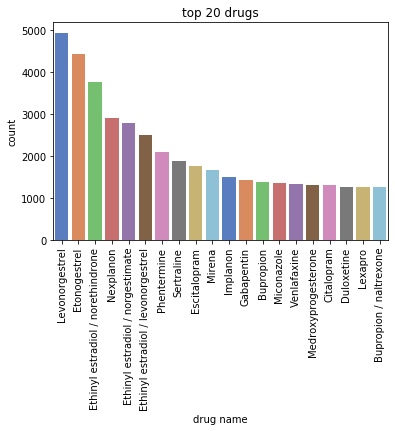

In [15]:
# top 20 drugs mentioned in the dataset

df_top20=df.drugName.value_counts()[:20].reset_index(name='count')
df_top20
sns.barplot(x='index',y='count',data=df_top20,palette='muted')
plt.xticks(rotation=90)
plt.xlabel('drug name')
plt.title('top 20 drugs')

Text(0.5, 1.0, 'top 20 conditions')

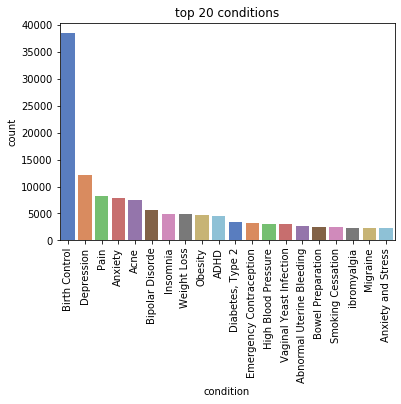

In [16]:
# top 20 conditions mentioned in the dataset

df1_top20=df.condition.value_counts()[:20].reset_index(name='count')
df1_top20
sns.barplot(x='index',y='count',data=df1_top20,palette='muted')
plt.xticks(rotation=90)
plt.xlabel('condition')
plt.title('top 20 conditions')

Text(0.5, 1.0, 'ratings')

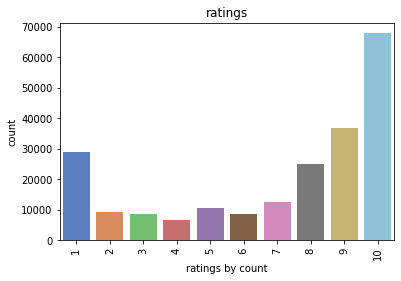

In [17]:
# top ratings mentioned in the dataset

df2_top20=df.rating.value_counts()[:20].reset_index(name='count')
df2_top20
sns.barplot(x='index',y='count',data=df2_top20,palette='muted')
plt.xticks(rotation=90)
plt.xlabel('ratings by count')
plt.title('ratings')

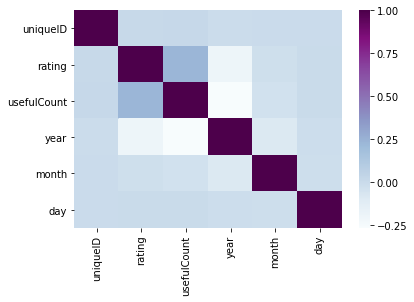

In [18]:
sns.heatmap(df.corr(),cmap="BuPu")

Text(0.5, 1.0, 'drugs count for top 20 conditions')

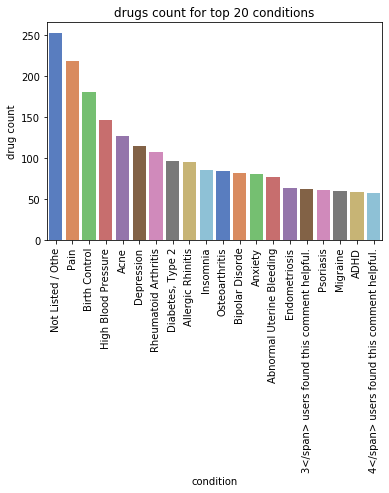

In [19]:
# plot of no of unique drugs for each top 20 condition since they are correlated

df_drugcond=df.groupby(['condition'])['drugName'].nunique().reset_index(name='drug count')
#df_drugcond=df.groupby(['drugName','condition']).sum()
df_drugcond=df_drugcond.sort_values(by='drug count',ascending=False)[:20]
df_drugcond.head()
sns.barplot(x='condition',y='drug count',data=df_drugcond,palette='muted')
plt.xticks(rotation=90)
plt.title('drugs count for top 20 conditions')

# some data cleaning required

In [20]:
df1_drugcond=df.groupby(['condition'])['drugName'].nunique().reset_index(name='drug count')
df1_drugcond=df1_drugcond.sort_values(by='drug count',ascending=True)[:20]
df1_drugcond.head()


,condition,drug count
322,"Epicondylitis, Tennis Elbow",1
797,Systemic Candidiasis,1
289,Diagnostic Bronchograms,1
310,Ectopic Pregnancy,1
781,Steroid Responsive Inflammatory Conditions,1


Text(0.5, 1.0, 'drugs count for bottom 20 conditions')

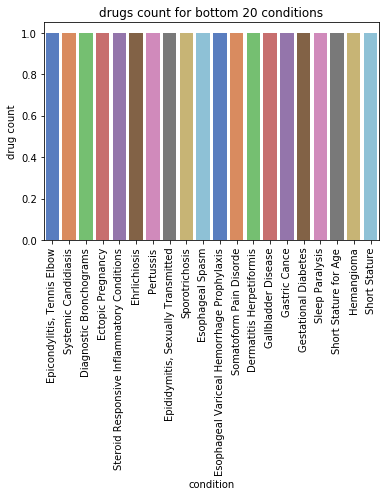

In [21]:
sns.barplot(x='condition',y='drug count',data=df1_drugcond,palette='muted')
plt.xticks(rotation=90)
plt.title('drugs count for bottom 20 conditions')

# Now we will analyse the ratings

Text(0.5, 1.0, 'count of ratings')

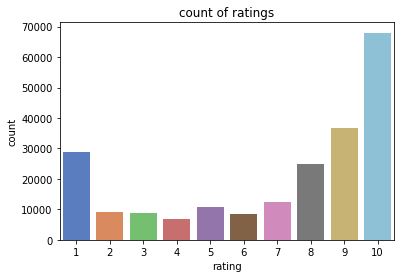

In [22]:
dfr=df['rating'].value_counts().sort_values(ascending=False).reset_index(name='count')
dfr.head()
sns.barplot(x='index',y='count',data=dfr,palette='muted')
plt.xlabel('rating')
plt.title('count of ratings')

Text(0, 0.5, 'ratings count')

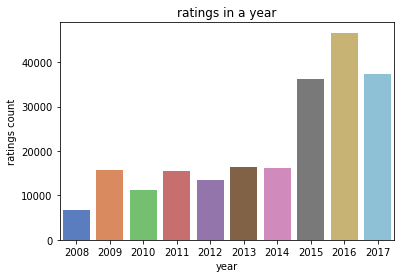

In [23]:
#plot reviews per year

dfry=df.groupby(['year']).size().reset_index(name='count')
dfry
sns.barplot(x='year',y='count',data=dfry,palette='muted')
plt.title('ratings in a year')
plt.xlabel('year')
plt.ylabel('ratings count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

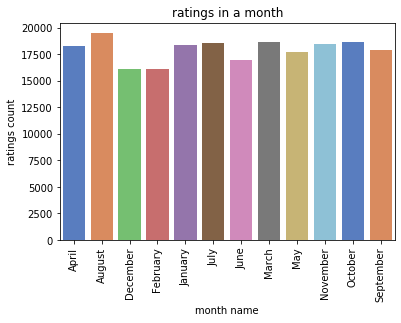

In [24]:
#plot reviews per month

def month_name (row):
    if row==1:
        return 'January'
    if row==2:
        return 'February'
    if row==3:
        return 'March'
    if row==4:
        return 'April'
    if row==5:
        return 'May'
    if row==6:
        return 'June'
    if row==7:
        return 'July'
    if row==8:
        return 'August'
    if row==9:
        return 'September'
    if row==10:
        return 'October'
    if row==11:
        return 'November'
    if row==12:
        return 'December'

 

df.apply(lambda row: month_name(row.month),axis=1)
#dg=data[['Year','Genre']]
#dg.head()
df['month name']=df.apply(lambda row: month_name(row.month),axis=1)
df.head()
dfrm=df.groupby(['month name']).size().reset_index(name='count')
sns.barplot(x='month name',y='count',data=dfrm,palette='muted')
plt.title('ratings in a month')
plt.xlabel('month name')
plt.ylabel('ratings count')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

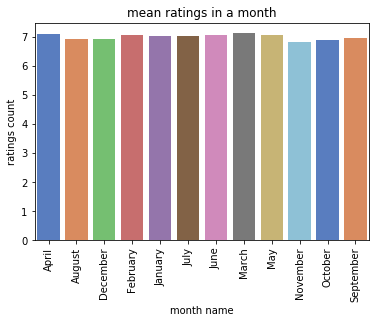

In [25]:
# mean ratings per month

dfrmm=df.groupby(['month name'])['rating'].mean().reset_index(name='count')
sns.barplot(x='month name',y='count',data=dfrmm,palette='muted')
plt.title('mean ratings in a month')
plt.xlabel('month name')
plt.ylabel('ratings count')
plt.xticks(rotation=90)

In [26]:
#remove condition column since it contains null values

#df=df.drop('condition',axis=1)

# now we will analyse the reviews

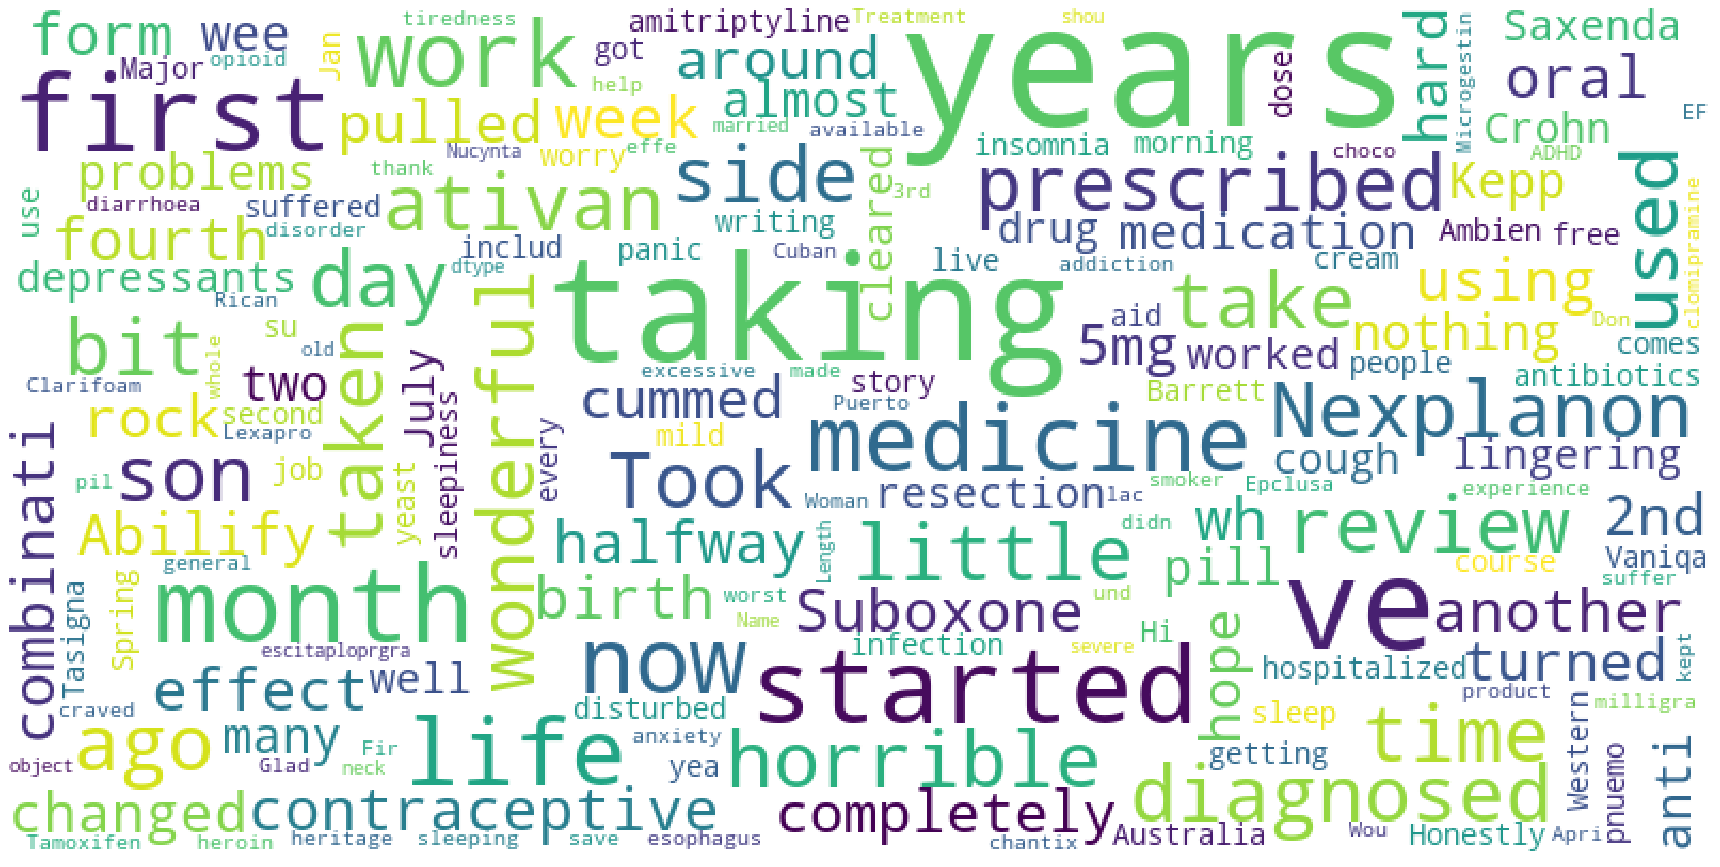

In [27]:
#wordcloud of all reviews

from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text,mask=None,max_words=200,max_font_size=80,figure_size=(24,16), title=None,title_size=40,image_color=False):
    stopwords=set(STOPWORDS)
    more_stopwords={'one','br','Po','th','sayi','fo','Unknown'}
    stopwords=stopwords.union(more_stopwords)
    
    wordcloud=WordCloud(background_color='white',
                       stopwords=stopwords,max_words=max_words,
                       max_font_size=max_font_size,
                       random_state=42,width=800,
                       height=400,mask=mask)
    
    wordcloud.generate(str(text))
    plt.figure(figsize=figure_size)
    
    if image_color:
        image_colors=ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
        plt.title(titke,fontdict={'size':title_size,'varticalalignment':'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title,fontdict={'size':title_size,'color':'black','verticalalignment':'bottom'})
        plt.axis('off')
        plt.tight_layout()
        
plot_wordcloud(df['review'])
        
        

In [206]:
#classifying reviews as negative, neutral and positive

df.loc[df['rating']<=4,'label']=-1
df.loc[(df['rating']>4) & (df['rating']<7),'label']=0
df.loc[df['rating']>=7,'label']=1

In [207]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day,label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,1.0
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,1.0
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,0.0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,1.0
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,1.0


In [208]:
fr=df.groupby(['label']).size().reset_index(name='count')

Text(0.5, 1.0, 'no of reviews')

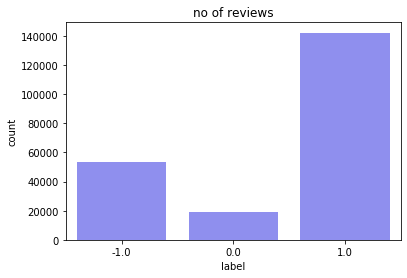

In [209]:
sns.barplot(x=fr['label'],y=fr['count'],color='blue',alpha=0.5)
plt.title('no of reviews')

In [210]:
d1=df[df['label']==-1]
d2=df[df['label']==0]
d3=df[df['label']==1]

In [211]:
#function for ngram generation
from collections import defaultdict

def c_ngrams(text,n_gram=1):
    for c in text:
        if c in ")&#?.!/;:\r\n*(-0123456789":
            text=text.replace(c,'')
    
    token=[token for token in text.lower().split(" ") if token !="" if token not in STOPWORDS]
    ngrams=zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

#function for horizontal bar chart
# def h_barchart(df,color):
#     barchart=sns.barplot(y=df["word"].values[::-1],x=df["wordcount"].values[::-1],orient='h',color=color)
#     return barchart





#fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
#c_ngrams("Hello lily this is rudrani",2)
# f="Hello lily this is rudrani lily rudrani"
# cf=defaultdict(int)
# c1=c_ngrams(f,2)
# for i in c1:
#     cf[i]+=1
    
# print(sorted(cf.items(),key=lambda x:x[1], reverse=True))


Text(0.5, 1.0, 'Frequent words of rating >7')

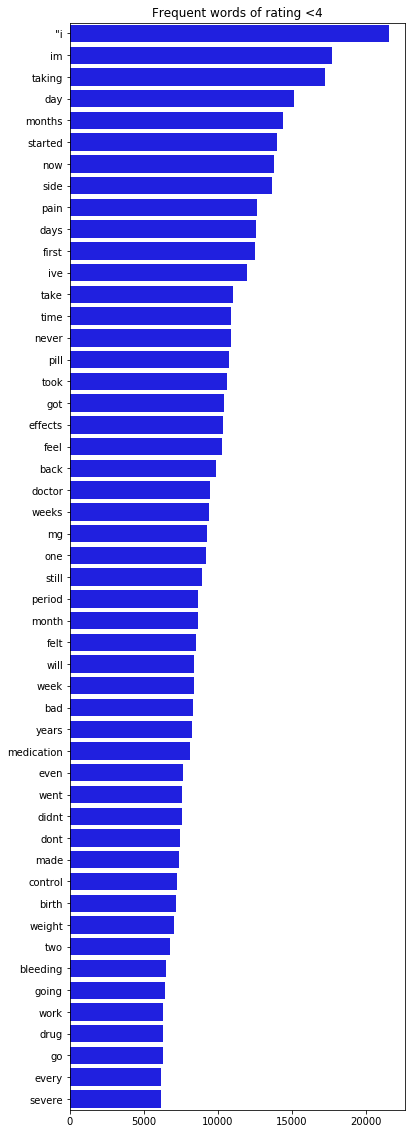

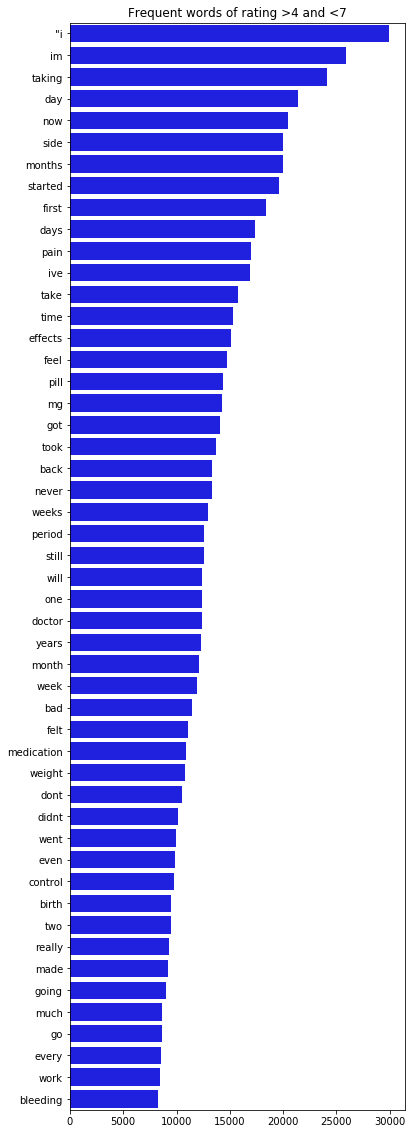

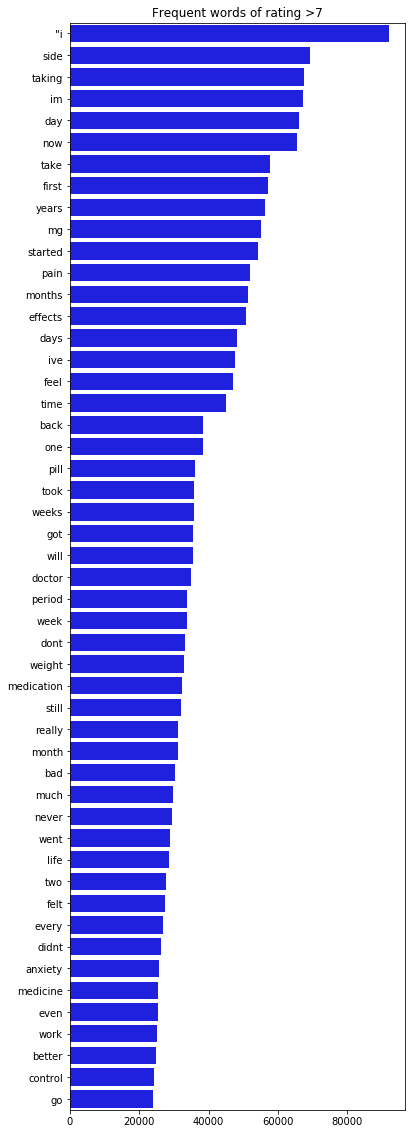

In [212]:
# for uni gram

fd1=defaultdict(int)

#for negative reviews
for i in d1["review"]:
    for j in c_ngrams(i):
        fd1[j]+=1
fds=pd.DataFrame(sorted(fd1.items(),key=lambda x:x[1],reverse=True))
fds.columns=["word","wordcount"]
fds=fds.head(50)

#print(fds)

plt.figure(figsize=(6,20))
f1=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='blue')
plt.title("Frequent words of rating <=4")

#for neutral reviews
for i in d2["review"]:
    for j in c_ngrams(i):
        fd1[j]+=1
fds=pd.DataFrame(sorted(fd1.items(),key=lambda x:x[1],reverse=True))
fds.columns=["word","wordcount"]
fds=fds.head(50)


plt.figure(figsize=(6,20))
f2=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='blue')
plt.title("Frequent words of rating >4 and <7")

#for positive reviews
for i in d3["review"]:
    for j in c_ngrams(i):
        fd1[j]+=1
fds=pd.DataFrame(sorted(fd1.items(),key=lambda x:x[1],reverse=True))
fds.columns=["word","wordcount"]
fds=fds.head(50)


plt.figure(figsize=(6,20))
f3=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='blue')
plt.title("Frequent words of rating >=7")

# fig, axes = plt.subplots(nrows=1, ncols=1)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='blue')
plt.title("Frequent words of rating <=4")

ax2=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='blue')
plt.title("Frequent words of rating >4 and <7")




In [35]:
# data = pd.DataFrame({'A':[1,2,3],
#                    'B':[4,5,6],
#                    'C':[7,8,9],
#                    'D':[1,3,5],
#                    'E':[5,3,6],
#                    'F':[7,4,3]}) 
# print(data)
# print(data['A'].values[::1])

Text(0.5, 1.0, 'Frequent words of rating >7')

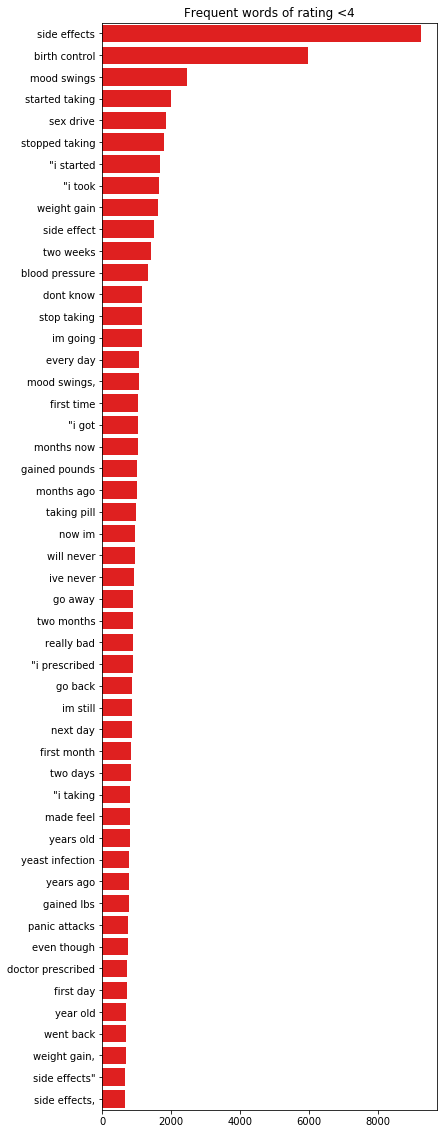

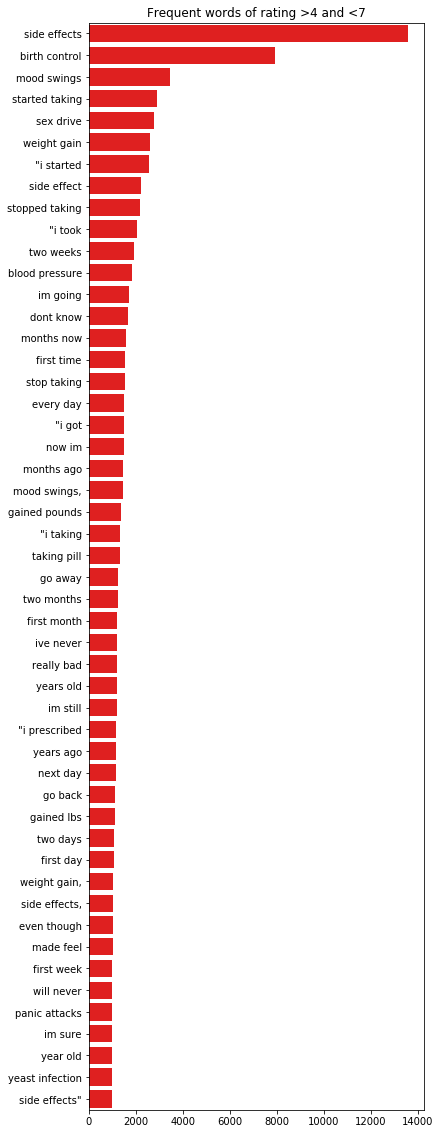

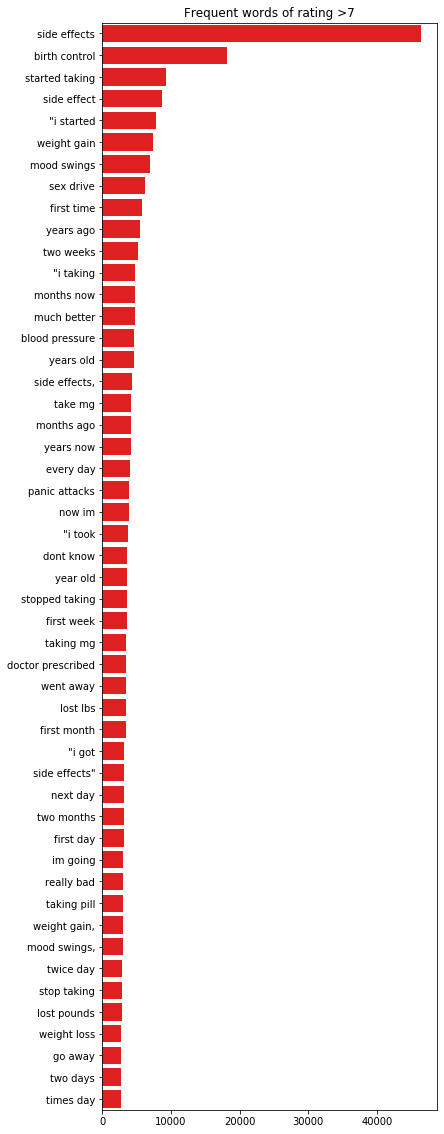

In [213]:
# for bigram

fd1=defaultdict(int)

#for negative reviews
for i in d1["review"]:
    for j in c_ngrams(i,2):
        fd1[j]+=1
fds=pd.DataFrame(sorted(fd1.items(),key=lambda x:x[1],reverse=True))
fds.columns=["word","wordcount"]
fds=fds.head(50)

#print(fds)

plt.figure(figsize=(6,20))
f1=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='red')
plt.title("Frequent bigrams of rating <=4")

#for neutral reviews
for i in d2["review"]:
    for j in c_ngrams(i,2):
        fd1[j]+=1
fds=pd.DataFrame(sorted(fd1.items(),key=lambda x:x[1],reverse=True))
fds.columns=["word","wordcount"]
fds=fds.head(50)


plt.figure(figsize=(6,20))
f2=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='red')
plt.title("Frequent bigrams of rating >4 and <7")

#for positive reviews
for i in d3["review"]:
    for j in c_ngrams(i,2):
        fd1[j]+=1
fds=pd.DataFrame(sorted(fd1.items(),key=lambda x:x[1],reverse=True))
fds.columns=["word","wordcount"]
fds=fds.head(50)


plt.figure(figsize=(6,20))
f3=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='red')
plt.title("Frequent bigrams of rating >=7")

Text(0.5, 1.0, 'Frequent words of rating >7')

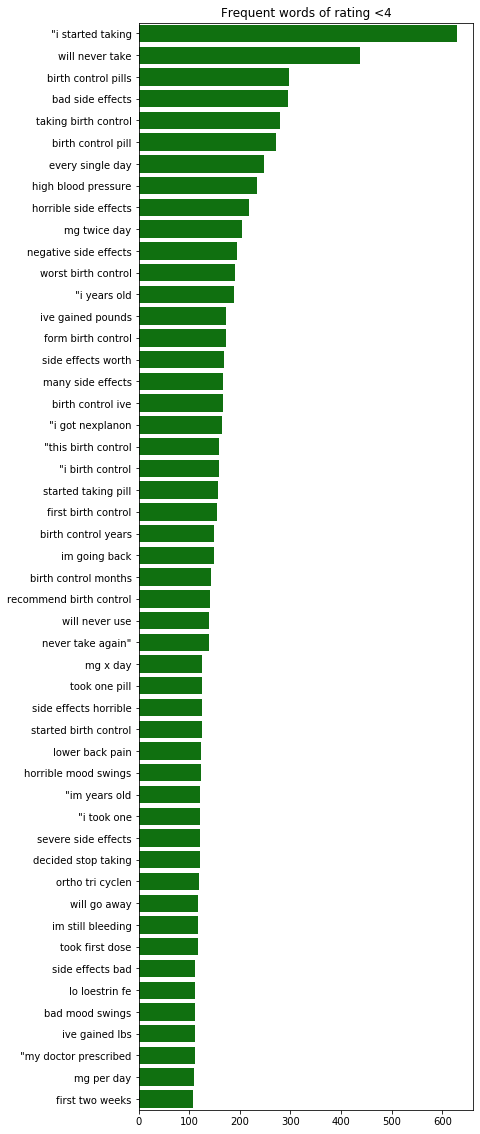

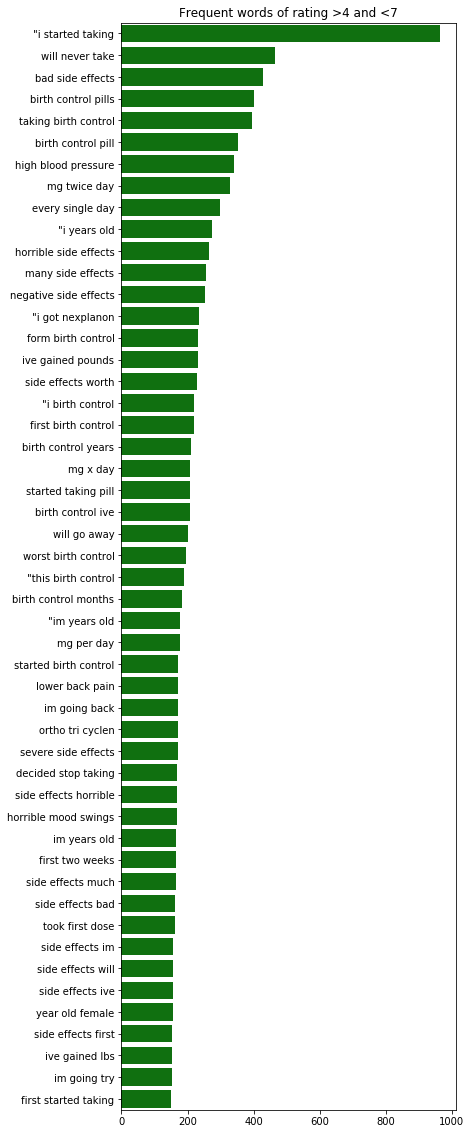

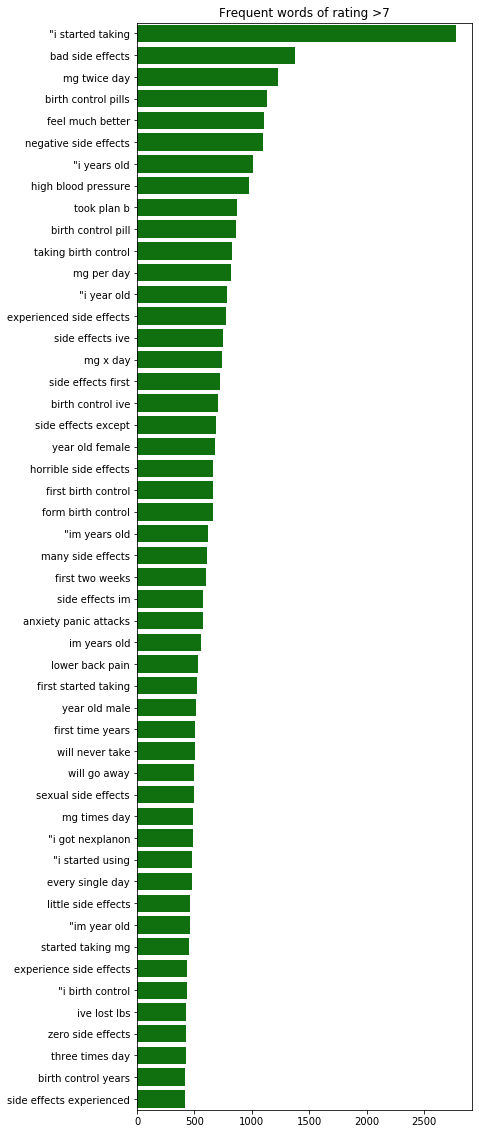

In [214]:
# for trigram

fd1=defaultdict(int)

#for negative reviews
for i in d1["review"]:
    for j in c_ngrams(i,3):
        fd1[j]+=1
fds=pd.DataFrame(sorted(fd1.items(),key=lambda x:x[1],reverse=True))
fds.columns=["word","wordcount"]
fds=fds.head(50)

#print(fds)

plt.figure(figsize=(6,20))
f1=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='green')
plt.title("Frequent words of rating <4")

#for neutral reviews
for i in d2["review"]:
    for j in c_ngrams(i,3):
        fd1[j]+=1
fds=pd.DataFrame(sorted(fd1.items(),key=lambda x:x[1],reverse=True))
fds.columns=["word","wordcount"]
fds=fds.head(50)


plt.figure(figsize=(6,20))
f2=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='green')
plt.title("Frequent words of rating >4 and <7")

#for positive reviews
for i in d3["review"]:
    for j in c_ngrams(i,3):
        fd1[j]+=1
fds=pd.DataFrame(sorted(fd1.items(),key=lambda x:x[1],reverse=True))
fds.columns=["word","wordcount"]
fds=fds.head(50)


plt.figure(figsize=(6,20))
f3=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='green')
plt.title("Frequent words of rating >7")

Text(0.5, 1.0, 'Frequent words of rating >7')

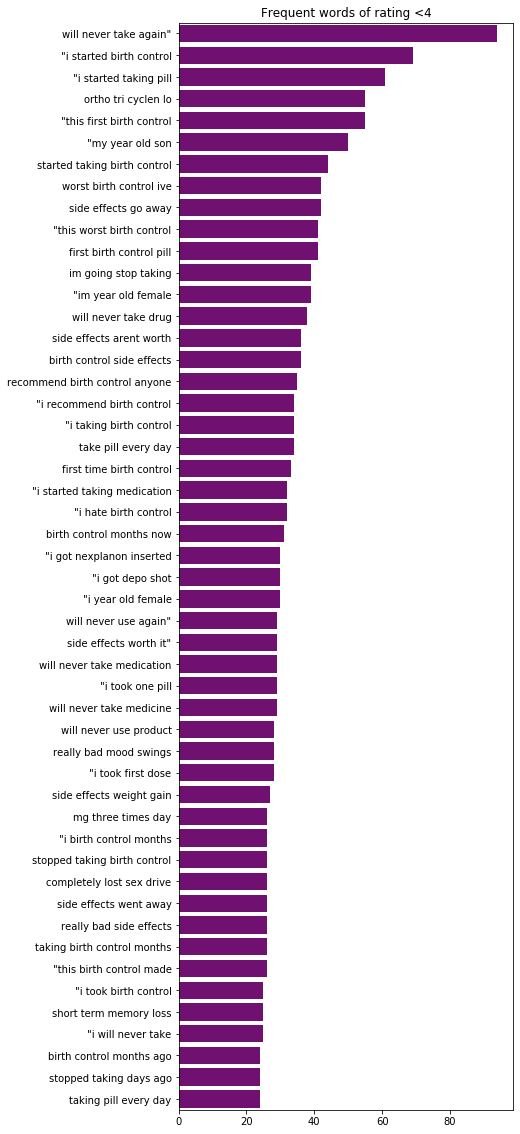

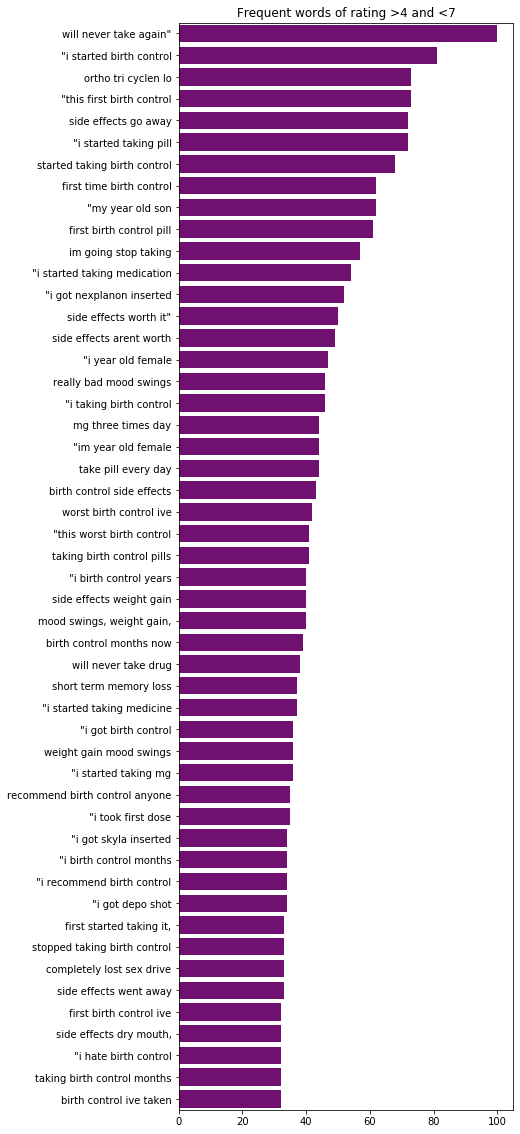

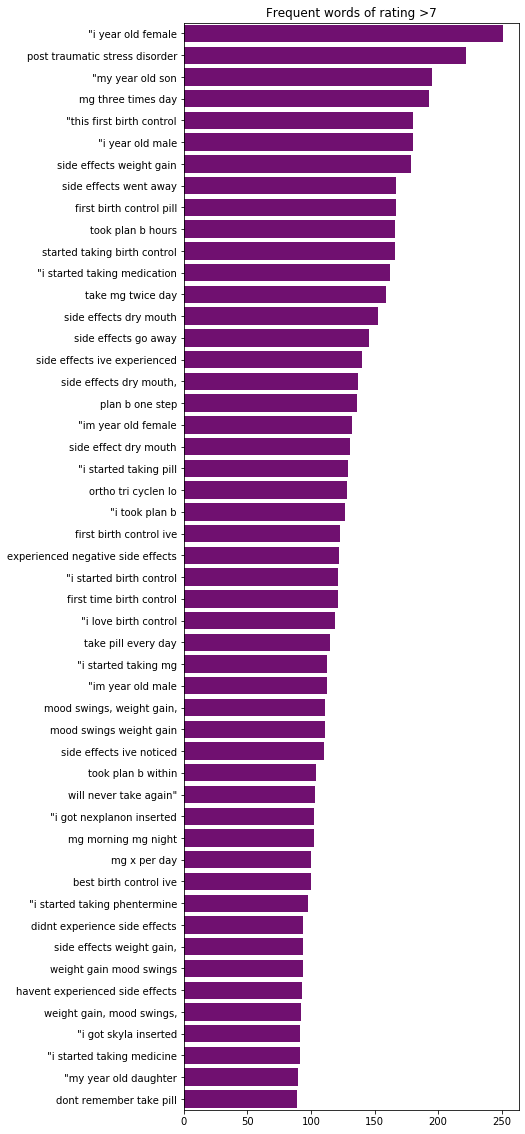

In [215]:
# for 4-gram

fd1=defaultdict(int)

#for negative reviews
for i in d1["review"]:
    for j in c_ngrams(i,4):
        fd1[j]+=1
fds=pd.DataFrame(sorted(fd1.items(),key=lambda x:x[1],reverse=True))
fds.columns=["word","wordcount"]
fds=fds.head(50)

#print(fds)

plt.figure(figsize=(6,20))
f1=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='purple')
plt.title("Frequent words of rating <4")

#for neutral reviews
for i in d2["review"]:
    for j in c_ngrams(i,4):
        fd1[j]+=1
fds=pd.DataFrame(sorted(fd1.items(),key=lambda x:x[1],reverse=True))
fds.columns=["word","wordcount"]
fds=fds.head(50)


plt.figure(figsize=(6,20))
f2=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='purple')
plt.title("Frequent words of rating >4 and <7")

#for positive reviews
for i in d3["review"]:
    for j in c_ngrams(i,4):
        fd1[j]+=1
fds=pd.DataFrame(sorted(fd1.items(),key=lambda x:x[1],reverse=True))
fds.columns=["word","wordcount"]
fds=fds.head(50)


plt.figure(figsize=(6,20))
f3=sns.barplot(y=fds["word"].values[::1],x=fds["wordcount"].values[::1],orient='h',color='purple')
plt.title("Frequent words of rating >7")

In [216]:
#analysing length of reviews

def no_words(text):
    n=len(text.split())
    return n

c=[]
for i in df['review']:
    n=no_words(i)
    c.append(n)

df['count_words']=c

In [217]:
df.head()
#print(list(df['review'][df['uniqueID']==206461]))

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day,label,count_words
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,1.0,17
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,1.0,141
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,0.0,134
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,1.0,89
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,1.0,124


In [41]:
#length of reviews
d_length=df['count_words'].sort_values(ascending=False).reset_index()
d_length=d_length.head(20)

In [218]:
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
#from wordcloud import STOPWORDS


    

In [66]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

vader_neg=[]
vader_neu=[]
vader_pos=[]
vader_com=[]

def sentiment_scores(text):
    so=SentimentIntensityAnalyzer()
    senti=so.polarity_scores(text)
    
    return [senti['neg'],senti['neu'], senti['pos'], senti['compound']]

for i in df['review']:
    s=sentiment_scores(i)
    vader_neg.append(s[0])
    vader_neu.append(s[1])
    vader_pos.append(s[2])
    vader_com.append(s[3])

df['vader_neg']=vader_neg
df['vader_neu']=vader_neu
df['vader_pos']=vader_pos
df['vader_com']=vader_com


# so=SentimentIntensityAnalyzer()
# senti=so.polarity_scores("i die")
# print("positive=",senti['pos']*100)
# print("neutral=",senti['neu']*100)
# print("negative=",senti['neg']*100)


In [219]:
# cleaning reviews
stops = set(stopwords.words('english'))
#stops=set(STOPWORDS)
more_stopwords={'one','br','Po','th','sayi','fo','Unknown'}
stops=stops.union(more_stopwords)
not_stop=["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)
    
stemmer=SnowballStemmer('english')

def cl_review(text):
    tr=BeautifulSoup(text,'html.parser').get_text()
    letters_only=re.sub('[^a-zA-Z]',' ',tr)
    words=letters_only.lower().split()
    mw=[w for w in words if not w in stops]
    word_stem=[stemmer.stem(w) for w in mw]
    return(' '.join(word_stem))

#print(cl_review("hello \n\r\8this is going rudrani@#"))

df['review_clean']=df['review'].apply(cl_review)

In [220]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day,label,count_words,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,1.0,17,no side effect take combin bystol mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,1.0,141,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,0.0,134,use take anoth oral contracept pill cycl happi...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,1.0,89,first time use form birth control glad went pa...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,1.0,124,suboxon complet turn life around feel healthie...


In [173]:
df['sentiment_score']= df['vader_com'].map(lambda x:2 if x>=0.05 else 1 if x<=-0.05 else 0 )
df.head()

,uniqueID,drugName,review,rating,date,usefulCount,year,month,day,month name,label,count_words,review_clean,vader_neg,vader_neu,vader_pos,vader_com,sentiment_score
0,206461,Valsartan,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,May,1.0,17,no side effect take combin bystol mg fish oil,0.136,0.864,0.000,-0.2960,1
1,95260,Guanfacine,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,April,1.0,141,son halfway fourth week intuniv becam concern ...,0.018,0.892,0.090,0.8603,2
2,92703,Lybrel,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,December,0.0,134,use take anoth oral contracept pill cycl happi...,0.041,0.876,0.084,0.7962,2
3,138000,Ortho Evra,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,November,1.0,89,first time use form birth control glad went pa...,0.027,0.879,0.093,0.7184,2
4,35696,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,November,1.0,124,suboxon complet turn life around feel healthie...,0.064,0.758,0.178,0.9403,2


# first we will perform in-domain sentiment analysis

## using (1,2)

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [290]:
#X_train, X_test, y_train, y_test=train_test_split(df['review_clean'], df['label'], test_size=0.25, random_state=0)


In [291]:
#[a1,b1]=ngram_features(1, 2, X_train, X_test, 20000)

In [292]:
#a1

<161297x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 8054887 stored elements in Compressed Sparse Row format>

In [329]:
# def ngram_features(min_ngram, max_ngram, df_train, df_test, num_features):
#     vect=CountVectorizer(analyzer='word',tokenizer=None,preprocessor=None, 
#                          stop_words=None,min_df=2, ngram_range=(min_ngram, max_ngram),
#                          max_features=num_features)
#     train_data=vect.fit_transform(df_train)
#     test_data=vect.fit_transform(df_test)
    
#     return train_data, test_data

# def tf_features(min_ngram, max_ngram, df_train, df_test, num_features):
#     tf=TfidfVectorizer(analyzer='word',tokenizer=None,preprocessor=None, 
#                          stop_words=None,min_df=2, ngram_range=(min_ngram, max_ngram),
#                          max_features=num_features)
#     train_data=tf.fit_transform(df_train)
#     test_data=tf.fit_transform(df_test)
    
#     return train_data, test_data

def logistic_regression(x_train,y_train,x_test,y_test):
    lr=LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000,multi_class='auto')
    lr.fit(x_train,y_train)
    
    y1_pred=lr.predict(x_train)
    y2_pred=lr.predict(x_test)
    
    train_accuracy=accuracy_score(y_train,y1_pred)*100
    test_accuracy=accuracy_score(y_test,y2_pred)*100
    
    return train_accuracy,test_accuracy

def linear_svc(x_train,y_train,x_test,y_test):
    ls=LinearSVC()
    ls.fit(x_train,y_train)
    
    y1_pred=ls.predict(x_train)
    y2_pred=ls.predict(x_test)
    
    train_accuracy=accuracy_score(y_train,y1_pred)*100
    test_accuracy=accuracy_score(y_test,y2_pred)*100
    
    return train_accuracy,test_accuracy

def random_forest(x_train,y_train,x_test,y_test,n_t=100):
    rf=RandomForestClassifier(n_estimators=n_t)
    rf.fit(x_train,y_train)
    
    y1_pred=rf.predict(x_train)
    y2_pred=rf.predict(x_test)
    
    train_accuracy=accuracy_score(y_train,y1_pred)*100
    test_accuracy=accuracy_score(y_test,y2_pred)*100
    
    return train_accuracy,test_accuracy

def multi_nb(x_train,y_train,x_test,y_test):
    lr=MultinomialNB()
    lr.fit(x_train,y_train)
    
    y1_pred=lr.predict(x_train)
    y2_pred=lr.predict(x_test)
    
    train_accuracy=accuracy_score(y_train,y1_pred)*100
    test_accuracy=accuracy_score(y_test,y2_pred)*100
    
    return train_accuracy,test_accuracy

def grad_bo(x_train,y_train,x_test,y_test,n_t=100):
    lr=GradientBoostingClassifier(n_estimators=n_t)
    lr.fit(x_train,y_train)
    
    y1_pred=lr.predict(x_train)
    y2_pred=lr.predict(x_test)
    
    train_accuracy=accuracy_score(y_train,y1_pred)*100
    test_accuracy=accuracy_score(y_test,y2_pred)*100
    
    return train_accuracy,test_accuracy



In [299]:
h1=[]
h2=[]

for i in range(10000,55000,5000): 

    vect=CountVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=i)
    tf=TfidfVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=i)
#tf=TfidfVectorizer(ngram_range=(1,2))

#pipeline=Pipeline([('vect',vect)])

#df_features=pipeline.fit_transform(df['review_clean'])
    df_features1=vect.fit_transform(df['review_clean'])
    df_features2=tf.fit_transform(df['review_clean'])

    h1.append(df_features1)
    h2.append(df_features2)
    #X_train, X_test, y_train, y_test=train_test_split(df_features1, df['label'], test_size=0.25, random_state=0)


In [306]:
#for multinomial naive bayes

# min_ngram=1
# max_ngram=2

num_features=10000

train_acc_cv=[]
test_acc_cv=[]
train_acc_tf=[]
test_acc_tf=[]


for i in range(9):
    
    print("no of features=",i)
#     [train_x1,test_x1]=ngram_features(min_ngram, max_ngram, X_train, X_test, i)
#     [train_x2,test_x2]=tf_features(min_ngram, max_ngram, X_train, X_test, i)
#     print("hello")
#     X_train, X_test, y_train, y_test=train_test_split(h1[i], df['label'], test_size=0.25, random_state=0)
    X_train1, X_test1, y_train1, y_test1=train_test_split(h1[i], df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(h2[i], df['label'], test_size=0.25, random_state=0)

    [a1,b1]=multi_nb(X_train1,y_train1,X_test1,y_test1)
    [a2,b2]=multi_nb(X_train2,y_train2,X_test2,y_test2)
    
    train_acc_cv.append(a1)
    test_acc_cv.append(b1)
    train_acc_tf.append(a2)
    test_acc_tf.append(b2)
    

no of features= 0
no of features= 1
no of features= 2
no of features= 3
no of features= 4
no of features= 5
no of features= 6
no of features= 7
no of features= 8


Text(0, 0.5, 'accuracy %')

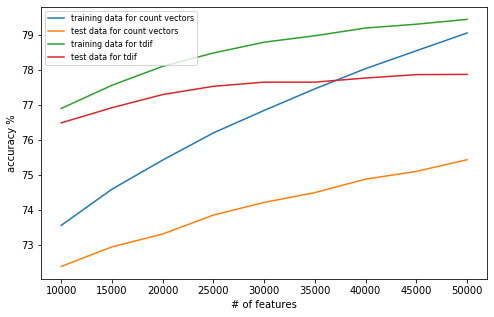

In [366]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf, "-c",label="test data for tdif")
sns.lineplot(n,train_acc_cv,palette='dark',label="training data for count vectors")
sns.lineplot(n,test_acc_cv,palette='dark',label="test data for count vectors")
sns.lineplot(n,train_acc_tf, palette='dark',label="training data for tdif")
sns.lineplot(n,test_acc_tf, palette='dark',label="test data for tdif")
plt.legend(loc="upper left",prop={"size":8})
#plt.title("line chart of e")
plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [309]:
#for logistic regression

min_ngram=1
max_ngram=2

num_features=10000

train_acc_cv1=[]
test_acc_cv1=[]
train_acc_tf1=[]
test_acc_tf1=[]


for i in range(9):
    
    print("no of features=",i)
    X_train1, X_test1, y_train1, y_test1=train_test_split(h1[i], df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(h2[i], df['label'], test_size=0.25, random_state=0)

    
    [a1,b1]=logistic_regression(X_train1,y_train1,X_test1,y_test1)
    [a2,b2]=logistic_regression(X_train2,y_train2,X_test2,y_test2)
    
    train_acc_cv1.append(a1)
    test_acc_cv1.append(b1)
    train_acc_tf1.append(a2)
    test_acc_tf1.append(b2)

no of features= 0
no of features= 1
no of features= 2
no of features= 3
no of features= 4
no of features= 5
no of features= 6
no of features= 7
no of features= 8


Text(0, 0.5, 'accuracy %')

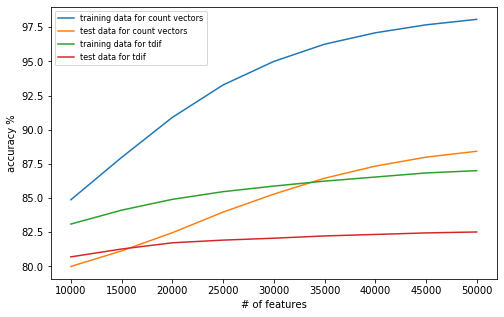

In [365]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv1,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv1,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf1, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf1, "-c",label="test data for tdif")

sns.lineplot(n,train_acc_cv1,palette='dark',label="training data for count vectors")
sns.lineplot(n,test_acc_cv1,palette='dark',label="test data for count vectors")
sns.lineplot(n,train_acc_tf1, palette='dark',label="training data for tdif")
sns.lineplot(n,test_acc_tf1, palette='dark',label="test data for tdif")
plt.legend(loc="upper left",prop={"size":8})
#plt.title("line chart of e")
plt.xlabel("# of features")
plt.ylabel("accuracy %")

#test_acc_tf1

In [311]:
#for random forest

train_acc_cv2=[]
test_acc_cv2=[]
train_acc_tf2=[]
test_acc_tf2=[]

for i in range(9):
    
    print("no of features=",i)
    X_train1, X_test1, y_train1, y_test1=train_test_split(h1[i], df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(h2[i], df['label'], test_size=0.25, random_state=0)

    
    [a1,b1]=random_forest(X_train1,y_train1,X_test1,y_test1,10)
    [a2,b2]=random_forest(X_train2,y_train2,X_test2,y_test2,10)
    
    train_acc_cv2.append(a1)
    test_acc_cv2.append(b1)
    train_acc_tf2.append(a2)
    test_acc_tf2.append(b2)
    
# train_acc_cv3=[]
# test_acc_cv3=[]
# train_acc_tf3=[]
# test_acc_tf3=[]

# for i in range(9):
    
#     print("no of features=",i)
#     X_train1, X_test1, y_train1, y_test1=train_test_split(h1[i], df['label'], test_size=0.25, random_state=0)

#     X_train2, X_test2, y_train2, y_test2=train_test_split(h2[i], df['label'], test_size=0.25, random_state=0)

    
#     [a1,b1]=random_forest(X_train1,y_train1,X_test1,y_test1,100)
#     [a2,b2]=random_forest(X_train2,y_train2,X_test2,y_test2,100)
    
#     train_acc_cv3.append(a1)
#     test_acc_cv3.append(b1)
#     train_acc_tf3.append(a2)
#     test_acc_tf3.append(b2)
    
# train_acc_cv4=[]
# test_acc_cv4=[]
# train_acc_tf4=[]
# test_acc_tf4=[]

# for i in range(9):
    
#     print("no of features=",i)
#     X_train1, X_test1, y_train1, y_test1=train_test_split(h1[i], df['label'], test_size=0.25, random_state=0)

#     X_train2, X_test2, y_train2, y_test2=train_test_split(h2[i], df['label'], test_size=0.25, random_state=0)

    
#     [a1,b1]=random_forest(X_train1,y_train1,X_test1,y_test1,100)
#     [a2,b2]=random_forest(X_train2,y_train2,X_test2,y_test2,100)
    
#     train_acc_cv4.append(a1)
#     test_acc_cv4.append(b1)
#     train_acc_tf4.append(a2)
#     test_acc_tf4.append(b2)


no of features= 0
no of features= 1
no of features= 2
no of features= 3
no of features= 4
no of features= 5
no of features= 6
no of features= 7
no of features= 8


Text(0, 0.5, 'accuracy %')

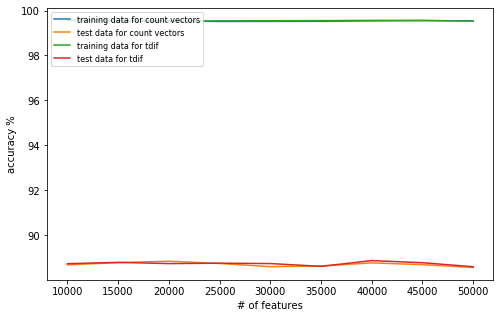

In [364]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv2,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv2,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf2, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf2, "-c",label="test data for tdif")

sns.lineplot(n,train_acc_cv2,palette='dark',label="training data for count vectors")
sns.lineplot(n,test_acc_cv2,palette='dark',label="test data for count vectors")
sns.lineplot(n,train_acc_tf2, palette='dark',label="training data for tdif")
sns.lineplot(n,test_acc_tf2, palette='dark',label="test data for tdif")
plt.legend(loc="upper left",prop={"size":8})
#plt.title("line chart of e")
plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [315]:
train_acc_cv3=[]
test_acc_cv3=[]
train_acc_tf3=[]
test_acc_tf3=[]

for i in range(9):
    
    print("no of features=",i)
    X_train1, X_test1, y_train1, y_test1=train_test_split(h1[i], df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(h2[i], df['label'], test_size=0.25, random_state=0)

    
    [a1,b1]=random_forest(X_train1,y_train1,X_test1,y_test1,50)
    [a2,b2]=random_forest(X_train2,y_train2,X_test2,y_test2,50)
    
    train_acc_cv3.append(a1)
    test_acc_cv3.append(b1)
    train_acc_tf3.append(a2)
    test_acc_tf3.append(b2)

no of features= 0
no of features= 1
no of features= 2
no of features= 3
no of features= 4
no of features= 5
no of features= 6
no of features= 7
no of features= 8


Text(0, 0.5, 'accuracy %')

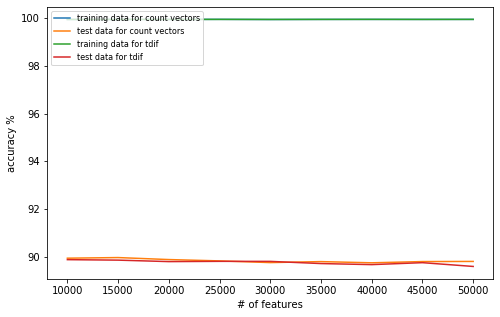

In [363]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv3,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv3,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf3, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf3, "-c",label="test data for tdif")

sns.lineplot(n,train_acc_cv3,palette='dark',label="training data for count vectors")
sns.lineplot(n,test_acc_cv3,palette='dark',label="test data for count vectors")
sns.lineplot(n,train_acc_tf3, palette='dark',label="training data for tdif")
sns.lineplot(n,test_acc_tf3, palette='dark',label="test data for tdif")
plt.legend(loc="upper left",prop={"size":8})
#plt.title("line chart of e")
plt.xlabel("# of features")
plt.ylabel("accuracy %")


In [320]:
train_acc_cv4=[]
test_acc_cv4=[]
train_acc_tf4=[]
test_acc_tf4=[]

for i in range(9):
    
    print("no of features=",i)
    X_train1, X_test1, y_train1, y_test1=train_test_split(h1[i], df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(h2[i], df['label'], test_size=0.25, random_state=0)

    
    [a1,b1]=random_forest(X_train1,y_train1,X_test1,y_test1,100)
    [a2,b2]=random_forest(X_train2,y_train2,X_test2,y_test2,100)
    
    train_acc_cv4.append(a1)
    test_acc_cv4.append(b1)
    train_acc_tf4.append(a2)
    test_acc_tf4.append(b2)

no of features= 0
no of features= 1
no of features= 2
no of features= 3
no of features= 4
no of features= 5
no of features= 6
no of features= 7
no of features= 8


Text(0, 0.5, 'accuracy %')

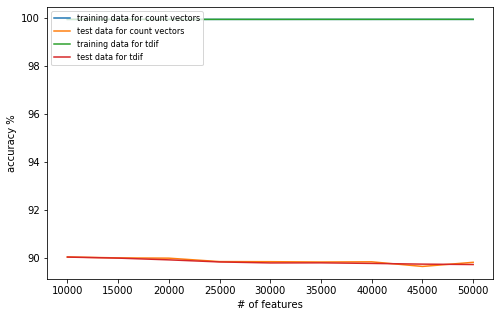

In [360]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv4,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv4,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf4, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf4, "-c",label="test data for tdif")

sns.lineplot(n,train_acc_cv4,palette='dark',label="training data for count vectors")
sns.lineplot(n,test_acc_cv4,palette='dark',label="test data for count vectors")
sns.lineplot(n,train_acc_tf4, palette='dark',label="training data for tdif")
sns.lineplot(n,test_acc_tf4, palette='dark',label="test data for tdif")

plt.legend(loc="upper left",prop={"size":8})
#plt.title("line chart of e")
plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [324]:
print(train_acc_cv4)
print(test_acc_cv4)
print(train_acc_tf4)
print(test_acc_tf4)

[99.94606223302355, 99.94606223302355, 99.94606223302355, 99.94730218168968, 99.94792215602274, 99.94792215602274, 99.94792215602274, 99.9485421303558, 99.94792215602274]
[90.02901461890414, 89.98995647807165, 89.97879700926235, 89.83558382620987, 89.83186400327344, 89.81884462299594, 89.8262842688688, 89.63285347617453, 89.80582524271846]
[99.94606223302355, 99.94606223302355, 99.94606223302355, 99.94730218168968, 99.94668220735662, 99.94792215602274, 99.94792215602274, 99.94792215602274, 99.9485421303558]
[90.0234348844995, 89.98065692073057, 89.90812037347023, 89.82070453446416, 89.77978648216344, 89.78350630509988, 89.7593274560131, 89.72956887252167, 89.71282966930774]


In [325]:
print(train_acc_cv3)
print(test_acc_cv3)
print(train_acc_tf3)
print(test_acc_tf3)

[99.93924251535987, 99.93986248969293, 99.93924251535987, 99.9435823356913, 99.93800256669374, 99.94172241269212, 99.94234238702518, 99.94172241269212, 99.94234238702518]
[89.93973886842987, 89.96577762898485, 89.88208161291521, 89.8262842688688, 89.75560763307666, 89.79652568537738, 89.7463080757356, 89.79838559684559, 89.80396533125024]
[99.93800256669374, 99.94172241269212, 99.94172241269212, 99.94172241269212, 99.93924251535987, 99.94110243835905, 99.94234238702518, 99.93986248969293, 99.94172241269212]
[89.8783617899788, 89.85790276382845, 89.79652568537738, 89.80768515418666, 89.80582524271846, 89.71468958077595, 89.67005170553881, 89.75188781014025, 89.59379533534204]


In [326]:
print(train_acc_cv2)
print(test_acc_cv2)
print(train_acc_tf2)
print(test_acc_tf2)

[99.56229812085779, 99.55857827485943, 99.53873909620141, 99.5139401228789, 99.51827994321036, 99.52075984054261, 99.5405990192006, 99.55919824919248, 99.53935907053449]
[88.68429862738535, 88.77915411226425, 88.84425101365176, 88.74381579436819, 88.60246252278392, 88.63036119480712, 88.76985455492319, 88.6917382732582, 88.56712420488785]
[99.55857827485943, 99.5424589421998, 99.52075984054261, 99.54183896786672, 99.54679876253122, 99.55299850586185, 99.56415804385699, 99.55485842886105, 99.53253935287078]
[88.73451623702712, 88.79403340400997, 88.73823605996355, 88.75683517464569, 88.74009597143177, 88.61548190306141, 88.87214968567496, 88.77729420079604, 88.59874269984749]


In [327]:
print(train_acc_cv1)
print(test_acc_cv1)
print(train_acc_tf1)
print(test_acc_tf1)

[84.87882601660291, 87.9780777075829, 90.90497653397149, 93.28009820393436, 95.00238690118229, 96.26155477163245, 97.09604022393474, 97.67943607134664, 98.08117943917122]
[80.00037198229364, 81.13863780084068, 82.46661458914556, 83.97686270133542, 85.29182010936279, 86.45426477699661, 87.33958263586653, 87.99613138414611, 88.42763084477178]
[83.10197957804547, 84.11873748426815, 84.91044470758911, 85.47152147901078, 85.88008456449903, 86.24400949800678, 86.54283712654296, 86.8422847294122, 87.0096777993391]
[80.70155860581036, 81.27441133802031, 81.73008964773277, 81.92724026336347, 82.06673362347952, 82.23226574415058, 82.34200052077522, 82.45359520886805, 82.52241193319198]


In [328]:
print(train_acc_cv)
print(test_acc_cv)
print(train_acc_tf)
print(test_acc_tf)

[73.56615436120944, 74.59655170275951, 75.4273173090634, 76.20104527672554, 76.84147876277922, 77.45649330117733, 78.0324494565925, 78.54144838403691, 79.04796741414906]
[72.39519398876614, 72.95316742923038, 73.31956998846854, 73.85894431425064, 74.21976713908418, 74.4987538593163, 74.88375553323662, 75.10322508648588, 75.43614923929621]
[76.89727645275485, 77.55878906613266, 78.09754676156408, 78.47821100206451, 78.78571827126358, 78.9692306738501, 79.18932156208733, 79.29843704470635, 79.4366913209793]
[76.48699921883718, 76.91849867946286, 77.2942007960421, 77.52854964103707, 77.64758397500279, 77.64758397500279, 77.76475839750027, 77.86147379384741, 77.86891343972027]


In [335]:
print(train_acc_cv5)
print(test_acc_cv5)
print(train_acc_tf5)
print(test_acc_tf5)

[72.49855855967563, 73.80174460777323, 74.79308356634036, 77.88427559099054, 79.32633588969416, 80.3455736932491]
[72.13666629468437, 73.3660677751739, 74.2216270505524, 76.86270133541643, 77.79079715805528, 78.38224900494737]
[73.135892174064, 74.51719498812749, 75.55689194467348, 78.95807113585498, 80.45468917586813, 81.56878305238163]
[72.69649964661681, 74.10631253952312, 74.99349030986126, 77.50065096901388, 78.49756351597664, 79.15225235278801]


In [331]:
train_acc_cv5=[]
test_acc_cv5=[]
train_acc_tf5=[]
test_acc_tf5=[]

r=[100,150,200,500,750,1000,1500,2000]

for i in r:
    
    print("no of features=",i)
    X_train1, X_test1, y_train1, y_test1=train_test_split(h1[0], df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(h2[0], df['label'], test_size=0.25, random_state=0)

    
    [a1,b1]=grad_bo(X_train1,y_train1,X_test1,y_test1,i)
    [a2,b2]=grad_bo(X_train2,y_train2,X_test2,y_test2,i)
    
    train_acc_cv5.append(a1)
    test_acc_cv5.append(b1)
    train_acc_tf5.append(a2)
    test_acc_tf5.append(b2)

no of features= 100
no of features= 150
no of features= 200
no of features= 500
no of features= 750
no of features= 1000
no of features= 1500


KeyboardInterrupt: 

Text(0, 0.5, 'accuracy')

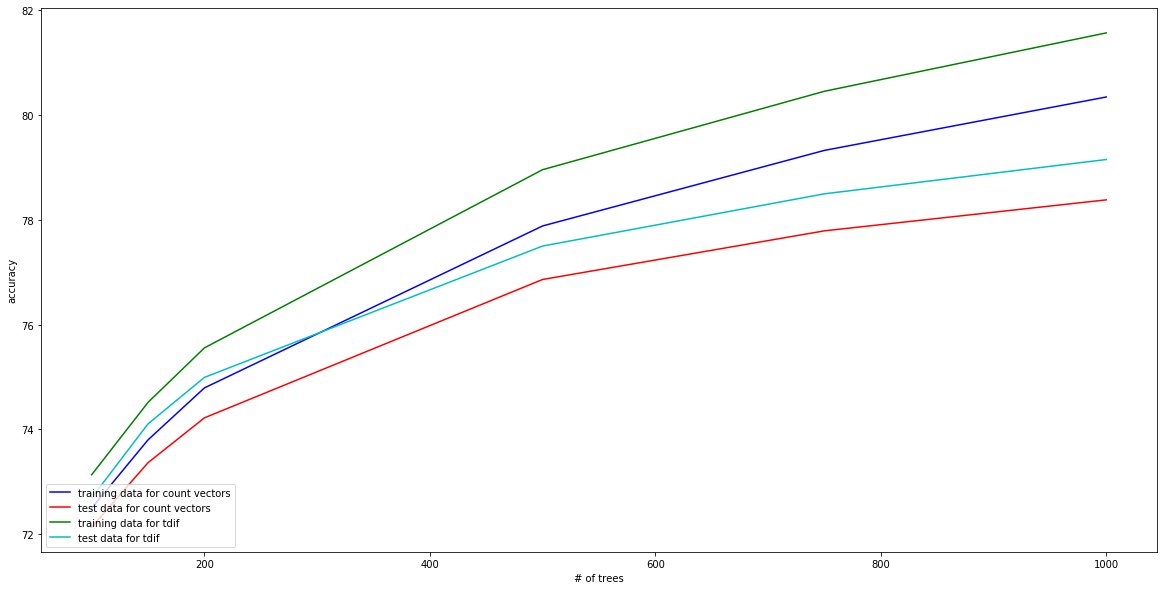

In [344]:
plt.figure(figsize=(20,10))
r=[100,150,200,500,750,1000]
plt.plot(r,train_acc_cv5,"-b",label="training data for count vectors")
plt.plot(r,test_acc_cv5,"-r",label="test data for count vectors")
plt.plot(r,train_acc_tf5, "-g",label="training data for tdif")
plt.plot(r,test_acc_tf5, "-c",label="test data for tdif")

plt.legend(loc="lower left")
#plt.title("line chart of e")
plt.xlabel("# of trees")
plt.ylabel("accuracy")
# print(train_acc_cv5)
# print(test_acc_cv5)
# print(train_acc_tf5)
# print(test_acc_tf5)


Text(0, 0.5, 'accuracy %')

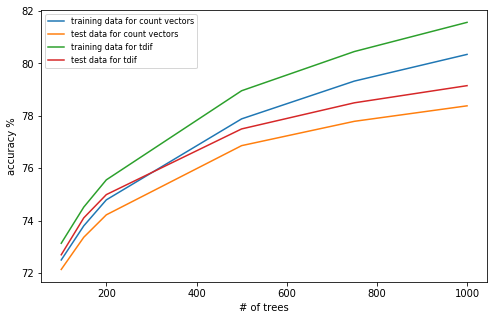

In [361]:
plt.figure(figsize=(8,5))
r=[100,150,200,500,750,1000]
sns.lineplot(r,train_acc_cv5,palette='dark',label="training data for count vectors")
sns.lineplot(r,test_acc_cv5,palette='dark',label="test data for count vectors")
sns.lineplot(r,train_acc_tf5, palette='dark',label="training data for tdif")
sns.lineplot(r,test_acc_tf5, palette='dark',label="test data for tdif")

plt.legend(loc="upper left",prop={"size":8})
#plt.title("line chart of e")
plt.xlabel("# of trees")
plt.ylabel("accuracy %")

## for (1,3)

In [371]:
k1=[]
k2=[]

for i in range(10000,55000,5000): 

    vect1=CountVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,3),max_features=i)
    tf1=TfidfVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,3),max_features=i)
#tf=TfidfVectorizer(ngram_range=(1,2))

#pipeline=Pipeline([('vect',vect)])

#df_features=pipeline.fit_transform(df['review_clean'])
    df_features3=vect1.fit_transform(df['review_clean'])
    df_features4=tf1.fit_transform(df['review_clean'])

    k1.append(df_features3)
    k2.append(df_features4)

In [372]:
train_acc_cv6=[]
test_acc_cv6=[]
train_acc_tf6=[]
test_acc_tf6=[]


for i in range(9):
    
    print("no of features=",i)
#     [train_x1,test_x1]=ngram_features(min_ngram, max_ngram, X_train, X_test, i)
#     [train_x2,test_x2]=tf_features(min_ngram, max_ngram, X_train, X_test, i)
#     print("hello")
#     X_train, X_test, y_train, y_test=train_test_split(h1[i], df['label'], test_size=0.25, random_state=0)
    X_train1, X_test1, y_train1, y_test1=train_test_split(k1[i], df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(k2[i], df['label'], test_size=0.25, random_state=0)

    [a1,b1]=multi_nb(X_train1,y_train1,X_test1,y_test1)
    [a2,b2]=multi_nb(X_train2,y_train2,X_test2,y_test2)
    
    train_acc_cv6.append(a1)
    test_acc_cv6.append(b1)
    train_acc_tf6.append(a2)
    test_acc_tf6.append(b2)
    

no of features= 0
no of features= 1
no of features= 2
no of features= 3
no of features= 4
no of features= 5
no of features= 6
no of features= 7
no of features= 8


In [373]:
print(train_acc_cv6)
print(test_acc_cv6)
print(train_acc_tf6)
print(test_acc_tf6)

[73.551894951549, 74.38452048085209, 75.20908634382538, 75.95491546649968, 76.57426982522924, 77.07148924034544, 77.6145867561083, 78.16202409220259, 78.65552366132043]
[72.32265744150578, 72.85645203288324, 73.28051184763605, 73.72875051147565, 74.16768961797419, 74.42435740058774, 74.79447978276234, 75.08090614886731, 75.3970910984637]
[76.94687439939986, 77.66046485675493, 78.12730552955107, 78.58298666435209, 78.83903606390696, 79.09260556612956, 79.30649671103616, 79.45219067930587, 79.59230487857802]
[76.50745824498753, 76.94453744001785, 77.42997433322174, 77.65874344381207, 77.8205557415467, 77.89867202321169, 77.93401034110776, 78.01956626864562, 78.13116095673846]


Text(0, 0.5, 'accuracy %')

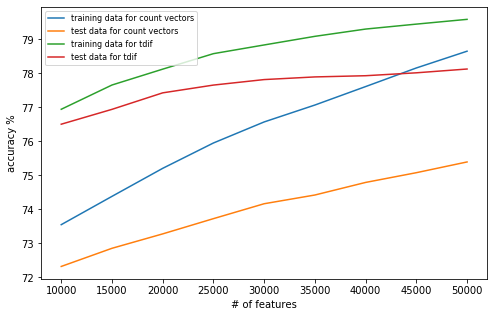

In [374]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
sns.lineplot(n,train_acc_cv6,palette='dark',label="training data for count vectors")
sns.lineplot(n,test_acc_cv6,palette='dark',label="test data for count vectors")
sns.lineplot(n,train_acc_tf6, palette='dark',label="training data for tdif")
sns.lineplot(n,test_acc_tf6, palette='dark',label="test data for tdif")
plt.legend(loc="upper left",prop={"size":8})
#plt.title("line chart of e")
plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [375]:
train_acc_cv7=[]
test_acc_cv7=[]
train_acc_tf7=[]
test_acc_tf7=[]


for i in range(9):
    
    print("no of features=",i)
    X_train1, X_test1, y_train1, y_test1=train_test_split(k1[i], df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(k2[i], df['label'], test_size=0.25, random_state=0)

    
    [a1,b1]=logistic_regression(X_train1,y_train1,X_test1,y_test1)
    [a2,b2]=logistic_regression(X_train2,y_train2,X_test2,y_test2)
    
    train_acc_cv7.append(a1)
    test_acc_cv7.append(b1)
    train_acc_tf7.append(a2)
    test_acc_tf7.append(b2)

no of features= 0
no of features= 1
no of features= 2
no of features= 3
no of features= 4
no of features= 5
no of features= 6
no of features= 7
no of features= 8


Text(0, 0.5, 'accuracy %')

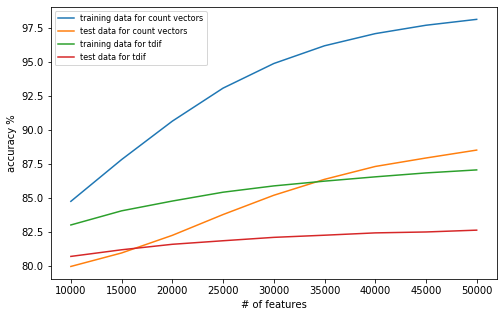

In [376]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
sns.lineplot(n,train_acc_cv7,palette='dark',label="training data for count vectors")
sns.lineplot(n,test_acc_cv7,palette='dark',label="test data for count vectors")
sns.lineplot(n,train_acc_tf7, palette='dark',label="training data for tdif")
sns.lineplot(n,test_acc_tf7, palette='dark',label="test data for tdif")
plt.legend(loc="upper left",prop={"size":8})
#plt.title("line chart of e")
plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [377]:
print(train_acc_cv7)
print(test_acc_cv7)
print(train_acc_tf7)
print(test_acc_tf7)

[84.73065215100095, 87.80200499699312, 90.62784800709251, 93.0556674953657, 94.86599254790852, 96.17041854467226, 97.06380155861547, 97.68067602001277, 98.11403807882354]
[79.942714726779, 80.93404753933713, 82.23040583268237, 83.75925305955437, 85.17650559833352, 86.34824982330841, 87.29494476062939, 87.91801510248112, 88.50016739203214]
[82.99348406975952, 84.03256105197244, 84.75235125265814, 85.40208435370775, 85.86582515483859, 86.21611065301896, 86.5322975628809, 86.82058562775501, 87.04191646465837]
[80.68109957966001, 81.16839638433211, 81.57199717293457, 81.83238477848455, 82.08161291522524, 82.23970539002343, 82.41081724509914, 82.47777405795485, 82.61168768366626]


In [286]:
#using countvectorizer and idf

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline

vect=CountVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=20000)
tf=TfidfVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=20000)
#tf=TfidfVectorizer(ngram_range=(1,2))

#pipeline=Pipeline([('vect',vect)])

#df_features=pipeline.fit_transform(df['review_clean'])
df_features1=vect.fit_transform(df['review_clean'])
df_features2=tf.fit_transform(df['review_clean'])



In [280]:
df_features1

<215063x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 10748914 stored elements in Compressed Sparse Row format>

In [287]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1=train_test_split(df_features1, df['label'], test_size=0.25, random_state=0)

X_train2, X_test2, y_train2, y_test2=train_test_split(df_features2, df['label'], test_size=0.25, random_state=0)

# X_train1, X_test1, y_train1, y_test1=train_test_split(df['review_clean'], df['label'], test_size=0.25)

# X_train2, X_test2, y_train2, y_test2=train_test_split(df['review_clean'], df['label'], test_size=0.25)

# df_features1=vect.fit_transform(df['review_clean'])
# df_features2=tf.fit_transform(df['review_clean'])

In [295]:
X_train1

<161297x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 8052504 stored elements in Compressed Sparse Row format>

In [296]:
a1

<161297x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 8054887 stored elements in Compressed Sparse Row format>

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [283]:
entries=[]
def train_model(classifier, feature_vector_train, label, feature_vector_valid,valid_y):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
#     if is_neural_net:
#         predictions = predictions.argmax(axis=-1)
    
    print(confusion_matrix(valid_y, predictions))
    print(classification_report(valid_y, predictions)) 
    
    #return metrics.accuracy_score(predictions, valid_y)
    return accuracy_score(valid_y, predictions)*100

In [227]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import Normalizer

#Count Vectors
accuracy=train_model(LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto'), X_train1, y_train1, X_test1,y_test1)

#Entry accuracy to a list
entries.clear()
entries.append((LogisticRegression().__class__.__name__, "Count Vectors", accuracy))

#TF IDF Vectors
accuracy = train_model(LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto'), X_train2, y_train2, X_test2,y_test2)

entries.append((LogisticRegression().__class__.__name__, "TF IDF Vectors", accuracy))

#print(entries)
#transform list to dataframe
df2=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
display(df2)

[[10061   672  2591]
 [ 1164  1584  2092]
 [ 1984  1022 32596]]
              precision    recall  f1-score   support

        -1.0       0.76      0.76      0.76     13324
         0.0       0.48      0.33      0.39      4840
         1.0       0.87      0.92      0.89     35602

    accuracy                           0.82     53766
   macro avg       0.71      0.67      0.68     53766
weighted avg       0.81      0.82      0.82     53766

[[ 9950   221  3342]
 [ 1454   464  2849]
 [ 1717   224 33545]]
              precision    recall  f1-score   support

        -1.0       0.76      0.74      0.75     13513
         0.0       0.51      0.10      0.16      4767
         1.0       0.84      0.95      0.89     35486

    accuracy                           0.82     53766
   macro avg       0.70      0.59      0.60     53766
weighted avg       0.79      0.82      0.79     53766



,model_name,Vectors,accuracy
0,LogisticRegression,Count Vectors,82.284343
1,LogisticRegression,TF IDF Vectors,81.759848


In [228]:
# LinearSVC Regression
#from sklearn.preprocessing import Normalizer

#Count Vectors
accuracy=train_model(LinearSVC(max_iter=2000), X_train1, y_train1, X_test1,y_test1)

#Entry accuracy to a list
entries.clear()
entries.append((LinearSVC().__class__.__name__, "Count Vectors", accuracy))

#TF IDF Vectors
accuracy = train_model(LinearSVC(), X_train2, y_train2, X_test2,y_test2)

entries.append((LinearSVC(max_iter=2000).__class__.__name__, "TF IDF Vectors", accuracy))

#print(entries)
#transform list to dataframe
df2=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
display(df2)

/Users/rudranibhadra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[ 9945   704  2675]
 [ 1185  1511  2144]
 [ 2175  1049 32378]]
              precision    recall  f1-score   support

        -1.0       0.75      0.75      0.75     13324
         0.0       0.46      0.31      0.37      4840
         1.0       0.87      0.91      0.89     35602

    accuracy                           0.82     53766
   macro avg       0.69      0.66      0.67     53766
weighted avg       0.80      0.82      0.81     53766

[[10230   348  2935]
 [ 1436   816  2515]
 [ 1922   399 33165]]
              precision    recall  f1-score   support

        -1.0       0.75      0.76      0.75     13513
         0.0       0.52      0.17      0.26      4767
         1.0       0.86      0.93      0.90     35486

    accuracy                           0.82     53766
   macro avg       0.71      0.62      0.64     53766
weighted avg       0.80      0.82      0.80     53766



,model_name,Vectors,accuracy
0,LinearSVC,Count Vectors,81.527359
1,LinearSVC,TF IDF Vectors,82.228546


In [229]:
#Decision tree

#Count Vectors
accuracy=train_model(DecisionTreeClassifier(max_depth=150), X_train1, y_train1, X_test1,y_test1)

#Entry accuracy to a list
entries.clear()
entries.append((DecisionTreeClassifier().__class__.__name__, "Count Vectors", accuracy))

#TF IDF Vectors
accuracy = train_model(DecisionTreeClassifier(max_depth=150), X_train2, y_train2, X_test2,y_test2)

entries.append((DecisionTreeClassifier().__class__.__name__, "TF IDF Vectors", accuracy))

#print(entries)
#transform list to dataframe
df2=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
display(df2)

[[10329   387  2608]
 [  554  2909  1377]
 [ 2093   811 32698]]
              precision    recall  f1-score   support

        -1.0       0.80      0.78      0.79     13324
         0.0       0.71      0.60      0.65      4840
         1.0       0.89      0.92      0.90     35602

    accuracy                           0.85     53766
   macro avg       0.80      0.76      0.78     53766
weighted avg       0.85      0.85      0.85     53766

[[10214   406  2893]
 [  557  2785  1425]
 [ 2120   739 32627]]
              precision    recall  f1-score   support

        -1.0       0.79      0.76      0.77     13513
         0.0       0.71      0.58      0.64      4767
         1.0       0.88      0.92      0.90     35486

    accuracy                           0.85     53766
   macro avg       0.79      0.75      0.77     53766
weighted avg       0.84      0.85      0.85     53766



,model_name,Vectors,accuracy
0,DecisionTreeClassifier,Count Vectors,85.436893
1,DecisionTreeClassifier,TF IDF Vectors,84.860321


In [231]:
# random forest

#Count Vectors
accuracy=train_model(RandomForestClassifier(n_estimators=120), X_train1, y_train1, X_test1,y_test1)

#Entry accuracy to a list
entries.clear()
entries.append((RandomForestClassifier().__class__.__name__, "Count Vectors", accuracy))

#TF IDF Vectors
accuracy = train_model(RandomForestClassifier(n_estimators=120), X_train2, y_train2, X_test2,y_test2)

entries.append((RandomForestClassifier().__class__.__name__, "TF IDF Vectors", accuracy))

#print(entries)
#transform list to dataframe
df2=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
display(df2)

[[10275    12  3037]
 [  251  2960  1629]
 [  281     5 35316]]
              precision    recall  f1-score   support

        -1.0       0.95      0.77      0.85     13324
         0.0       0.99      0.61      0.76      4840
         1.0       0.88      0.99      0.93     35602

    accuracy                           0.90     53766
   macro avg       0.94      0.79      0.85     53766
weighted avg       0.91      0.90      0.90     53766

[[10282     7  3224]
 [  241  2865  1661]
 [  294     1 35191]]
              precision    recall  f1-score   support

        -1.0       0.95      0.76      0.85     13513
         0.0       1.00      0.60      0.75      4767
         1.0       0.88      0.99      0.93     35486

    accuracy                           0.90     53766
   macro avg       0.94      0.78      0.84     53766
weighted avg       0.91      0.90      0.89     53766



,model_name,Vectors,accuracy
0,RandomForestClassifier,Count Vectors,90.300562
1,RandomForestClassifier,TF IDF Vectors,89.904401


In [298]:
#multinomial Naive bayes

#Count Vectors
accuracy=train_model(MultinomialNB(), X_train1, y_train1, X_test1,y_test1)
#accuracy=train_model(MultinomialNB(), a1, y_train, b1,y_test)
#Entry accuracy to a list
entries.clear()
entries.append((MultinomialNB().__class__.__name__, "Count Vectors", accuracy))

#TF IDF Vectors
accuracy = train_model(MultinomialNB(), X_train2, y_train2, X_test2,y_test2)

entries.append((MultinomialNB().__class__.__name__, "TF IDF Vectors", accuracy))

#print(entries)
#transform list to dataframe
df2=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
display(df2)

[[ 8966  1472  2889]
 [ 1304  1758  1930]
 [ 2916  3834 28697]]
              precision    recall  f1-score   support

        -1.0       0.68      0.67      0.68     13327
         0.0       0.25      0.35      0.29      4992
         1.0       0.86      0.81      0.83     35447

    accuracy                           0.73     53766
   macro avg       0.60      0.61      0.60     53766
weighted avg       0.76      0.73      0.74     53766

[[ 7326     2  5999]
 [ 1225    33  3734]
 [ 1241     7 34199]]
              precision    recall  f1-score   support

        -1.0       0.75      0.55      0.63     13327
         0.0       0.79      0.01      0.01      4992
         1.0       0.78      0.96      0.86     35447

    accuracy                           0.77     53766
   macro avg       0.77      0.51      0.50     53766
weighted avg       0.77      0.77      0.73     53766



,model_name,Vectors,accuracy
0,MultinomialNB,Count Vectors,73.319570
1,MultinomialNB,TF IDF Vectors,77.294201


In [185]:
# #bagging

# #Count Vectors
# accuracy=train_model(BaggingClassifier(), X_train1, y_train1, X_test1,y_test1)

# #Entry accuracy to a list
# entries.clear()
# entries.append((BaggingClassifier().__class__.__name__, "Count Vectors", accuracy))

# #TF IDF Vectors
# accuracy = train_model(BaggingClassifier(), X_train2, y_train2, X_test2,y_test2)

# entries.append((BaggingClassifier().__class__.__name__, "TF IDF Vectors", accuracy))

# #print(entries)
# #transform list to dataframe
# df2=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
# display(df2)

In [ ]:
#gradient boosting

#Count Vectors
accuracy=train_model(GradientBoostingClassifier(), X_train1, y_train1, X_test1,y_test1)

#Entry accuracy to a list
entries.clear()
entries.append((GradientBoostingClassifier().__class__.__name__, "Count Vectors", accuracy))

#TF IDF Vectors
accuracy = train_model(GradientBoostingClassifier(), X_train2, y_train2, X_test2,y_test2)

entries.append((GradientBoostingClassifier().__class__.__name__, "TF IDF Vectors", accuracy))

#print(entries)
#transform list to dataframe
df2=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
display(df2)

In [ ]:
#adaboost

#Count Vectors
accuracy=train_model(AdaBoostClassifier(), X_train1, y_train1, X_test1,y_test1)

#Entry accuracy to a list
entries.clear()
entries.append((AdaBoostClassifier().__class__.__name__, "Count Vectors", accuracy))

#TF IDF Vectors
accuracy = train_model(AdaBoostClassifier(), X_train2, y_train2, X_test2,y_test2)

entries.append((AdaBoostClassifier().__class__.__name__, "TF IDF Vectors", accuracy))

#print(entries)
#transform list to dataframe
df2=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
display(df2)

## using (1,3)

In [232]:
vect=CountVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,3),max_features=20000)
tf=TfidfVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,3),max_features=20000)
#tf=TfidfVectorizer(ngram_range=(1,2))

#pipeline=Pipeline([('vect',vect)])

#df_features=pipeline.fit_transform(df['review_clean'])
df_features1=vect.fit_transform(df['review_clean'])
df_features2=tf.fit_transform(df['review_clean'])


In [236]:
X_train1, X_test1, y_train1, y_test1=train_test_split(df_features1, df['label'], test_size=0.25)

X_train2, X_test2, y_train2, y_test2=train_test_split(df_features2, df['label'], test_size=0.25)

In [238]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import Normalizer

#Count Vectors
accuracy=train_model(LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto'), X_train1, y_train1, X_test1,y_test1)

#Entry accuracy to a list
entries.clear()
entries.append((LogisticRegression().__class__.__name__, "Count Vectors", accuracy))

#TF IDF Vectors
accuracy = train_model(LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto'), X_train2, y_train2, X_test2,y_test2)

entries.append((LogisticRegression().__class__.__name__, "TF IDF Vectors", accuracy))

#print(entries)
#transform list to dataframe
df2=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
display(df2)

[[10057   673  2676]
 [ 1193  1541  2079]
 [ 1999   960 32588]]
              precision    recall  f1-score   support

        -1.0       0.76      0.75      0.75     13406
         0.0       0.49      0.32      0.39      4813
         1.0       0.87      0.92      0.89     35547

    accuracy                           0.82     53766
   macro avg       0.71      0.66      0.68     53766
weighted avg       0.81      0.82      0.81     53766

[[ 9834   234  3278]
 [ 1492   470  2751]
 [ 1736   235 33736]]
              precision    recall  f1-score   support

        -1.0       0.75      0.74      0.74     13346
         0.0       0.50      0.10      0.17      4713
         1.0       0.85      0.94      0.89     35707

    accuracy                           0.82     53766
   macro avg       0.70      0.59      0.60     53766
weighted avg       0.79      0.82      0.79     53766



,model_name,Vectors,accuracy
0,LogisticRegression,Count Vectors,82.182048
1,LogisticRegression,TF IDF Vectors,81.910501


In [239]:
# LinearSVC Regression
#from sklearn.preprocessing import Normalizer

#Count Vectors
accuracy=train_model(LinearSVC(max_iter=2000), X_train1, y_train1, X_test1,y_test1)

#Entry accuracy to a list
entries.clear()
entries.append((LinearSVC().__class__.__name__, "Count Vectors", accuracy))

#TF IDF Vectors
accuracy = train_model(LinearSVC(), X_train2, y_train2, X_test2,y_test2)

entries.append((LinearSVC(max_iter=2000).__class__.__name__, "TF IDF Vectors", accuracy))

#print(entries)
#transform list to dataframe
df2=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
display(df2)

/Users/rudranibhadra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[ 9964   659  2783]
 [ 1222  1467  2124]
 [ 2139   938 32470]]
              precision    recall  f1-score   support

        -1.0       0.75      0.74      0.75     13406
         0.0       0.48      0.30      0.37      4813
         1.0       0.87      0.91      0.89     35547

    accuracy                           0.82     53766
   macro avg       0.70      0.65      0.67     53766
weighted avg       0.80      0.82      0.81     53766

[[10087   356  2903]
 [ 1461   811  2441]
 [ 1939   397 33371]]
              precision    recall  f1-score   support

        -1.0       0.75      0.76      0.75     13346
         0.0       0.52      0.17      0.26      4713
         1.0       0.86      0.93      0.90     35707

    accuracy                           0.82     53766
   macro avg       0.71      0.62      0.64     53766
weighted avg       0.80      0.82      0.80     53766



,model_name,Vectors,accuracy
0,LinearSVC,Count Vectors,81.651973
1,LinearSVC,TF IDF Vectors,82.336421


In [240]:
#Decision tree

#Count Vectors
accuracy=train_model(DecisionTreeClassifier(max_depth=150), X_train1, y_train1, X_test1,y_test1)

#Entry accuracy to a list
entries.clear()
entries.append((DecisionTreeClassifier().__class__.__name__, "Count Vectors", accuracy))

#TF IDF Vectors
accuracy = train_model(DecisionTreeClassifier(max_depth=150), X_train2, y_train2, X_test2,y_test2)

entries.append((DecisionTreeClassifier().__class__.__name__, "TF IDF Vectors", accuracy))

#print(entries)
#transform list to dataframe
df2=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
display(df2)

[[10199   371  2836]
 [  569  2797  1447]
 [ 1961   726 32860]]
              precision    recall  f1-score   support

        -1.0       0.80      0.76      0.78     13406
         0.0       0.72      0.58      0.64      4813
         1.0       0.88      0.92      0.90     35547

    accuracy                           0.85     53766
   macro avg       0.80      0.76      0.78     53766
weighted avg       0.85      0.85      0.85     53766

[[10085   453  2808]
 [  536  2735  1442]
 [ 2075   822 32810]]
              precision    recall  f1-score   support

        -1.0       0.79      0.76      0.77     13346
         0.0       0.68      0.58      0.63      4713
         1.0       0.89      0.92      0.90     35707

    accuracy                           0.85     53766
   macro avg       0.79      0.75      0.77     53766
weighted avg       0.84      0.85      0.85     53766



,model_name,Vectors,accuracy
0,DecisionTreeClassifier,Count Vectors,85.28810
1,DecisionTreeClassifier,TF IDF Vectors,84.86776


In [241]:
# random forest

#Count Vectors
accuracy=train_model(RandomForestClassifier(n_estimators=120), X_train1, y_train1, X_test1,y_test1)

#Entry accuracy to a list
entries.clear()
entries.append((RandomForestClassifier().__class__.__name__, "Count Vectors", accuracy))

#TF IDF Vectors
accuracy = train_model(RandomForestClassifier(n_estimators=120), X_train2, y_train2, X_test2,y_test2)

entries.append((RandomForestClassifier().__class__.__name__, "TF IDF Vectors", accuracy))

#print(entries)
#transform list to dataframe
df2=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
display(df2)

[[10310     2  3094]
 [  291  2890  1632]
 [  309     1 35237]]
              precision    recall  f1-score   support

        -1.0       0.95      0.77      0.85     13406
         0.0       1.00      0.60      0.75      4813
         1.0       0.88      0.99      0.93     35547

    accuracy                           0.90     53766
   macro avg       0.94      0.79      0.84     53766
weighted avg       0.91      0.90      0.90     53766

[[10157     5  3184]
 [  258  2845  1610]
 [  278     5 35424]]
              precision    recall  f1-score   support

        -1.0       0.95      0.76      0.85     13346
         0.0       1.00      0.60      0.75      4713
         1.0       0.88      0.99      0.93     35707

    accuracy                           0.90     53766
   macro avg       0.94      0.79      0.84     53766
weighted avg       0.91      0.90      0.90     53766



,model_name,Vectors,accuracy
0,RandomForestClassifier,Count Vectors,90.088532
1,RandomForestClassifier,TF IDF Vectors,90.068073


In [237]:
#multinomial Naive bayes

#Count Vectors
accuracy=train_model(MultinomialNB(), X_train1, y_train1, X_test1,y_test1)

#Entry accuracy to a list
entries.clear()
entries.append((MultinomialNB().__class__.__name__, "Count Vectors", accuracy))

#TF IDF Vectors
accuracy = train_model(MultinomialNB(), X_train2, y_train2, X_test2,y_test2)

entries.append((MultinomialNB().__class__.__name__, "TF IDF Vectors", accuracy))

#print(entries)
#transform list to dataframe
df2=pd.DataFrame(entries, columns=['model_name', 'Vectors', 'accuracy'])
display(df2)

[[ 8957  1499  2950]
 [ 1302  1691  1820]
 [ 2896  3975 28676]]
              precision    recall  f1-score   support

        -1.0       0.68      0.67      0.67     13406
         0.0       0.24      0.35      0.28      4813
         1.0       0.86      0.81      0.83     35547

    accuracy                           0.73     53766
   macro avg       0.59      0.61      0.60     53766
weighted avg       0.76      0.73      0.74     53766

[[ 7382    14  5950]
 [ 1260    39  3414]
 [ 1405    29 34273]]
              precision    recall  f1-score   support

        -1.0       0.73      0.55      0.63     13346
         0.0       0.48      0.01      0.02      4713
         1.0       0.79      0.96      0.86     35707

    accuracy                           0.78     53766
   macro avg       0.67      0.51      0.50     53766
weighted avg       0.75      0.78      0.73     53766



,model_name,Vectors,accuracy
0,MultinomialNB,Count Vectors,73.139159
1,MultinomialNB,TF IDF Vectors,77.547149


### ensemble model

In [242]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

lr=LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=2000)
#lr.fit(X_train2,y_train2)

ls=LinearSVC()

rf=RandomForestClassifier()

mb=MultinomialNB()

dt=DecisionTreeClassifier()

eclf=VotingClassifier(estimators=[('lr',lr),('ls',ls),('rf',rf),('mb',mb),('dt',dt)],voting='hard')

params={'lr__C': [1.0, 10.0, 100.0], 'rf__n_estimators': [100,120,150, 200], 'dt__max_depth': [50, 100,150,200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X_train2, y_train2)

grid.score(X_test2,y_test2)


KeyboardInterrupt: 

# Cross domain analysis using cv

In [407]:
# df_p=pd.concat([data_p['condition'],df])
conditions=['Birth Control', 'Depression','Pain', 'Anxiety', 'Diabetes, Type 2']
# df_p.head()

def m_d(condition):
    df_c=df[df['condition']==condition]
    vect=CountVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=20000)
#     tf=TfidfVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=20000)
    df_p=vect.fit_transform(df_c['review_clean'])
    X_train,X_test,y_train,y_test=train_test_split(df_p, df_c['label'], test_size=0.25, random_state=0)
    return X_train, X_test, y_train, y_test
    

In [408]:
X_BC_train,X_BC_test, y_BC_train, y_BC_test = m_d('Birth Control')
X_D_train, X_D_test, y_D_train, y_D_test = m_d('Depression')
X_P_train, X_P_test, y_P_train, y_P_test = m_d('Pain')
X_A_train, X_A_test, y_A_train, y_A_test = m_d('Anxiety')
X_Dia_train, X_Dia_test, y_Dia_train, y_Dia_test = m_d('Diabetes, Type 2')

In [412]:
train_str_Inputs = [['X_BC_train', 'y_BC_train'],['X_D_train', 'y_D_train'], ['X_P_train','y_P_train'], ['X_A_train','y_A_train'],['X_Dia_train','y_Dia_train']]
test_str_Inputs = [['X_BC_test','y_BC_test'], ['X_D_test','y_D_test'],['X_P_test','y_P_test'],['X_A_test','y_A_test'],['X_Dia_test','y_Dia_test']]
     
string_combination= [t+j for j in test_str_Inputs for t in train_str_Inputs]


 
train_var_Inputs= [(X_BC_train, y_BC_train),(X_D_train, y_D_train), (X_P_train,y_P_train), (X_A_train,y_A_train),(X_Dia_train,y_Dia_train)]
test_var_Inputs = [(X_BC_test,y_BC_test), (X_D_test,y_D_test),(X_P_test,y_P_test),(X_A_test,y_A_test),(X_Dia_test,y_Dia_test)]
var_combination= [t+j for j in test_var_Inputs for t in train_var_Inputs]

(28827,)

In [414]:

#v = CountVectorizer(analyzer = "word", ngram_range= (1,2))
dicti= {}
dicti['train']=[]
dicti['test']=[]
dicti['accuracy']=[]

for i , (X_train, y_train,X_test,  y_test) in zip(string_combination, var_combination):
#         print('-'*100)
    print(i)
#         print('-'*100)
        
        
#         train_features= v.fit_transform(X_train)

#         test_features=v.transform(X_test)
#         dense_features=train_features.toarray()
#         dense_test= test_features.toarray()

    lr=LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000,multi_class='auto')
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
       
    dicti['train'].append(i[0][2:4])
    dicti['test'].append(i[3][2:4])
    dicti['accuracy'].append(float(accuracy))  
    print('Accuracy = ' +str(accuracy))
    
    
#     for classifier in Classifiers:
#             try:
                
#                 lr = LogisticRegression().fit(train_features,y_train)
#                 pred = fit.predict(test_features)
#             except Exception:
#                 fit = classifier.fit(dense_features,y_train)
#                 pred = fit.predict(dense_test)
#             accuracy = accuracy_score(pred,y_test)
    
#             #accuracy = accuracy_score(pred,y_test)
#             dicti['train'].append(i[0][2:4])
#             dicti['test'].append(i[3][2:4])
#             dicti['accuracy'].append(float(accuracy))  
#             print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))

['X_BC_train', 'y_BC_train', 'X_BC_test', 'y_BC_test']
Accuracy = 0.926423144968259
['X_D_train', 'y_D_train', 'X_BC_test', 'y_BC_test']
Accuracy = 0.4869393277136018
['X_P_train', 'y_P_train', 'X_BC_test', 'y_BC_test']
Accuracy = 0.42834842335310647
['X_A_train', 'y_A_train', 'X_BC_test', 'y_BC_test']
Accuracy = 0.48027890519304817
['X_Dia_train', 'y_Dia_train', 'X_BC_test', 'y_BC_test']
Accuracy = 0.4547819752315537
['X_BC_train', 'y_BC_train', 'X_D_test', 'y_D_test']
Accuracy = 0.46234791187109503
['X_D_train', 'y_D_train', 'X_D_test', 'y_D_test']
Accuracy = 0.9168036829990135
['X_P_train', 'y_P_train', 'X_D_test', 'y_D_test']
Accuracy = 0.6126274251890825
['X_A_train', 'y_A_train', 'X_D_test', 'y_D_test']
Accuracy = 0.6205195659322591
['X_Dia_train', 'y_Dia_train', 'X_D_test', 'y_D_test']
Accuracy = 0.5577112791844788
['X_BC_train', 'y_BC_train', 'X_P_test', 'y_P_test']
Accuracy = 0.4165858389912706
['X_D_train', 'y_D_train', 'X_P_test', 'y_P_test']
Accuracy = 0.6702230843840931
['

In [416]:
cross_domain= pd.DataFrame.from_dict(dicti)
cross_domain['test'].unique()

abbreviation= ['BC', 'D_', 'P_', 'A_', 'Di']

cross_domain.replace(to_replace=abbreviation, value=conditions,inplace=True)

cross_data_logistic=cross_domain.pivot_table(values='accuracy', index= 'train', columns='test')
cross_data_logistic

# cross_data_logistic_s= cross_data_logistic.reindex(index=['Depression', 'Anxiety','Pain', 'Birth Control','Diabetes, Type 2' ],columns= ['Depression', 'Anxiety','Pain', 'Birth Control','Diabetes, Type 2' ])


test,Anxiety,Birth Control,Depression,"Diabetes, Type 2",Pain
train,,,,,
Anxiety,0.913466,0.480279,0.620520,0.590963,0.710475
Birth Control,0.372760,0.926423,0.462348,0.355529,0.416586
Depression,0.621096,0.486939,0.916804,0.463734,0.670223
"Diabetes, Type 2",0.657962,0.454782,0.557711,0.934602,0.536372
Pain,0.616487,0.428348,0.612627,0.525565,0.902522


In [420]:
cross_data_logistic_s= cross_data_logistic.reindex(index=['Depression', 'Anxiety','Pain', 'Birth Control','Diabetes, Type 2' ],columns= ['Depression', 'Anxiety','Pain', 'Birth Control','Diabetes, Type 2' ])
cross_data_logistic_s['avg train accuracy']=cross_data_logistic_s[cross_data_logistic_s.columns[::-1]].mean(axis=1)
cross_data_logistic_s.loc['avg test accuracy']=cross_data_logistic_s[cross_data_logistic_s.columns[::-1]].mean(axis=0)
cross_data_logistic_s

test,Depression,Anxiety,Pain,Birth Control,"Diabetes, Type 2",avg train accuracy
train,,,,,,
Depression,0.916804,0.621096,0.670223,0.486939,0.463734,0.631759
Anxiety,0.620520,0.913466,0.710475,0.480279,0.590963,0.663141
Pain,0.612627,0.616487,0.902522,0.428348,0.525565,0.617110
Birth Control,0.462348,0.372760,0.416586,0.926423,0.355529,0.506729
"Diabetes, Type 2",0.557711,0.657962,0.536372,0.454782,0.934602,0.628286
avg test accuracy,0.634002,0.636354,0.647236,0.555354,0.574078,0.609405


In [1]:
#df.head()